# Analysis of the Most Streamed Spotify Songs in 2023



## 1. Business Understanding

This initial phase focuses on understanding the project objectives and requirements from a business perspective, then converting this knowledge into a data mining problem definition and a preliminary plan.

## 2. Data Understanding

This phase involves initial data collection and familiarization, including data cleaning, transformation, and exploration to identify quality issues and insights about the data.

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from statsmodels.formula.api import ols

import folium as fl
import time

# Setting styles for plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Ignore warnings in the output
import warnings
warnings.filterwarnings('ignore')

In [2]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [3]:
# Load dataset
file_path = "https://raw.githubusercontent.com/diogo-costa-silva/assets/main/data/spotify-2023.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Creating a copy of the dataframe for cleaning
df_cleaned = df.copy()

### 2.1. General Information about the dataset

In [4]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


The dataframe contains various features related to songs, artists, and their attributes or performance metrics across different platforms.

In order to better understand each feature present in the dataset, here's a quick overview of the dataset columns based on the initial few rows:

- track_name: The title of the tracks.
- artist(s)_name: Names of the artist(s) associated with each track.
- artist_count: The number of artists contributing to each track.
- released_year, released_month, released_day: The release date components for each track.
- Various metrics representing the track's presence and popularity on different music streaming platforms: in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts
- bpm: The tempo of the track, measured in beats per minute.
- key: The key in which the track is composed.
- mode: The mode of the track (major or minor).
- Various metrics representing the track's musical qualities, including danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%.



In [5]:
df.shape

(953, 24)

In [6]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

### 2.2. Data Quality Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
# Checking for duplicates
num_duplicates = df.duplicated().sum()
num_duplicates

0

### 2.3. Explore unique feature values

In [10]:
#df['released_year'].unique()

In [11]:
#df['released_month'].unique()

In [12]:
#df['released_day'].unique()

In [13]:
#df['streams'].unique()

 it seems there's a peculiar value: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'. This doesn't follow the numerical pattern that we would expect for a column that's supposed to represent streaming counts.

In [14]:
#df['in_deezer_playlists'].unique()

In [15]:
#df['in_shazam_charts'].unique()

In [16]:
#df['bpm'].unique()

In [17]:
#df['mode'].unique()

In [18]:
#df['danceability_%'].unique()

In [19]:
#df['liveness_%'].unique()

In [20]:
#df['instrumentalness_%'].unique()

In [21]:
#df['speechiness_%'].unique()

### 2.4. Data Pre-processing

Before we dive into individual data cleaning tasks, let's summarize the initial steps we need to undertake for <b>Data Cleaning and Transformation</b>:
<br>
1. Convert 'released_year', 'released_month', and 'released_day' into a single datetime object.
2. Clean the 'streams' column and convert its data type.
3. Remove commas from 'in_deezer_playlists' and 'in_shazam_charts' and convert them to integers. If there are NaN values, changed them to 0.
4. Discuss the potential conversion of 'key' and 'mode' into category types.
5. Handle NaN values in ‘in_shazam_charts’ and ‘key’. The NaN values in ‘in_shazam_charts’ should be replaced with 0.

We will start with the conversion of the 'released_year', 'released_month', and 'released_day' columns into a single datetime object. This process involves creating a string representation of the date and then converting that string to a datetime object. 

In [22]:
# Step 1: Ensure the year, month, and day columns are integers (they should already be)
for col in ['released_year', 'released_month', 'released_day']:
    df_cleaned[col] = df_cleaned[col].astype(int)

# Step 2: Combine the year, month, and day into a single column (as a string)
df_cleaned['release_date'] = df_cleaned['released_year'].astype(str) + '-' + \
                             df_cleaned['released_month'].astype(str).str.zfill(2) + '-' + \
                             df_cleaned['released_day'].astype(str).str.zfill(2)  # zfill ensures a format like 2023-07-14

# Step 3: Convert the 'release_date' column to a datetime object
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], format='%Y-%m-%d')

# Step 4: (Optional) Drop the original 'released_year', 'released_month', and 'released_day' columns
# We will retain these columns for now, as they might be useful for analysis later on.

# Display the first few rows of the cleaned dataframe to verify our changes
df_cleaned[['released_year', 'released_month', 'released_day', 'release_date']].head()


,released_year,released_month,released_day,release_date
0,2023,7,14,2023-07-14
1,2023,3,23,2023-03-23
2,2023,6,30,2023-06-30
3,2019,8,23,2019-08-23
4,2023,5,18,2023-05-18


The 'released_year', 'released_month', and 'released_day' columns were successfully merged into a single 'released_date' column in the datetime format.

Next, we'll clean the 'streams' column. This process typically involves removing any non-numeric characters that might interfere with calculations or statistical analysis, and converting the cleaned strings to an integer data type. This step ensures that the 'streams' data is ready for any numerical operations we might need to perform during the analysis. 

In [23]:
# Cleaning the 'streams' column by removing non-numeric characters and converting to integers
df_cleaned['streams'] = df_cleaned['streams'].astype(str).str.replace('[^\d]', '', regex=True).astype(int)

df_cleaned[['streams']].head()  # Verifying the transformation

,streams
0,141381703
1,133716286
2,140003974
3,800840817
4,303236322


The 'streams' column has been successfully cleaned and converted to integers. All non-numeric characters were removed, ensuring that this column is now suitable for numerical analysis.

Next, we'll clean the 'in_deezer_playlists' and 'in_shazam_charts' columns. This involves:

1. Removing any commas from the numbers, which are typically used as thousand separators.
2. Converting the cleaned strings to integers.
3. Handling NaN or other problematic values by replacing them with 0.

In [24]:
# Cleaning 'in_deezer_playlists' and 'in_shazam_charts' columns, converting to integers, and handling NaN values

# Remove commas and convert to integers (if conversion fails due to NaN or non-numeric, replace with 0)
df_cleaned['in_deezer_playlists'] = df_cleaned['in_deezer_playlists'].replace('[,]', '', regex=True).astype(float).fillna(0).astype(int)
df_cleaned['in_shazam_charts'] = df_cleaned['in_shazam_charts'].replace('[,]', '', regex=True).astype(float).fillna(0).astype(int)

# Verifying the transformation
df_cleaned[['in_deezer_playlists', 'in_shazam_charts']].head()

,in_deezer_playlists,in_shazam_charts
0,45,826
1,58,382
2,91,949
3,125,548
4,87,425


The 'in_deezer_playlists' and 'in_shazam_charts' columns have been successfully cleaned, with commas removed and the data converted to integers. Any NaN or problematic values were replaced with 0, making these columns ready for numerical analysis.

Next, we should discuss the conversion of 'key' and 'mode' into categorical data types. In data analysis, especially when preparing data for machine learning models, it's important to properly format categorical variables. This often involves converting columns that contain categorical data into a format that is recognized as such, which can help with memory efficiency and potentially improve the performance of certain algorithms.

- Key of the song ('key'): This represents the musical key in which a song is written, a category that is inherently nominal. Since there are a limited number of musical keys, it makes sense to convert this column into a categorical type, which can facilitate certain types of analysis and visualizations.

- Mode of the song ('mode'): This typically indicates whether a piece of music is in a major key or a minor key, another inherently categorical attribute. Converting this to a categorical type makes sense for the same reasons as the 'key' column.

For both columns, converting them to category types will ensure they are treated appropriately in our analyses and can help with both memory usage and computational efficiency, particularly when creating machine learning models.

Now, we'll proceed with converting these columns to category types. Additionally, we will handle NaN values in the ‘key’ column by investigating its content and deciding the best strategy for NaN replacement or imputation. The 'in_shazam_charts' column has already been cleaned in previous steps.

In [25]:
# Converting 'key' and 'mode' columns to category types
df_cleaned['key'] = df_cleaned['key'].astype('category')
df_cleaned['mode'] = df_cleaned['mode'].astype('category')

# Handling NaN values in 'key' - we need to check if there are any NaN values first
nan_in_key = df_cleaned['key'].isna().sum()

# Checking the data types of 'key' and 'mode' and the number of NaNs in 'key'
key_mode_dtypes = df_cleaned[['key', 'mode']].dtypes
nan_in_key, key_mode_dtypes

(95,
 key     category
 mode    category
 dtype: object)

The 'key' and 'mode' columns have been successfully converted to category types.

Upon inspection, we found 95 NaN values in the 'key' column. Given that these represent musical keys, it wouldn't be appropriate to fill these missing values arbitrarily, as doing so could introduce bias or inaccuracies in the analysis.

In the context of data preparation for analysis or machine learning, we have several options:

1. Imputation based on other data: If there are other features correlated with 'key', we could use them to impute the missing values (e.g., using a model to predict the missing keys based on other song attributes). However, this approach requires a suitable model and sufficient related data.

2. Filling with a placeholder value: We could fill the NaNs with a placeholder value indicating that the key is unknown. This approach keeps the data size consistent but introduces a new category that the model will interpret as a distinct value, which might not be accurate.

3. Dropping the missing values: If the number of rows with missing 'key' data is small compared to the entire dataset, we might consider dropping these rows. This method reduces the risk of introducing bias, but at the expense of a smaller dataset.

Considering that we have 95 missing values, we need to decide based on the total size of our dataset. If the dataset is significantly large, option 3 could be viable; otherwise, option 2 may be more appropriate to avoid losing too much data.

The dataset contains 953 entries in total. Given this, the 95 entries with missing 'key' values represent approximately 10% of the dataset.

Here's how we can proceed based on this information:

1. Dropping the missing values: Removing 10% of the dataset could potentially eliminate valuable information and might not be the best approach, especially if the remaining data doesn't sufficiently represent the scope needed for accurate analysis or model training.

2. Filling with a placeholder value: This approach seems more balanced, as it retains all entries while acknowledging the missing information. We could use a placeholder like 'Unknown' for the missing 'key' values. This method acknowledges the incompleteness of the data without introducing unwarranted bias.

Given the circumstances, option 2 seems to be the most appropriate. We'll fill the NaN values in the 'key' column with 'Unknown', which will later be considered as a separate category during analysis and model training. Let's implement this solution.

In [26]:
# Filling NaN values in 'key' with a placeholder value 'Unknown'
df_cleaned['key'] = df_cleaned['key'].cat.add_categories('Unknown').fillna('Unknown')

# Verifying the operation by checking again for NaN and viewing the first few rows where 'key' was initially NaN
nan_check_after_filling = df_cleaned['key'].isna().sum()  # this should be 0 now
rows_with_unknown_key = df_cleaned[df_cleaned['key'] == 'Unknown'].head()

nan_check_after_filling, rows_with_unknown_key[['key']]

(0,
         key
 12  Unknown
 17  Unknown
 22  Unknown
 35  Unknown
 44  Unknown)

In [27]:
df_cleaned.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
release_date            0
dtype: int64

The NaN values in the 'key' column have been successfully replaced with the placeholder 'Unknown', and we've verified that there are no longer any NaN values in this column. This approach maintains the integrity of our dataset while acknowledging the presence of missing or unrecorded information.

With these preprocessing steps completed, your dataset is now cleaner and structured more suitably for in-depth analysis and machine learning. Each step taken ensures the data's consistency, accuracy, and readiness for the subsequent stages of your project, particularly exploratory data analysis (EDA), where insights begin to take shape.

#### Saving cleaned dataframe to CSV

In [28]:
# Define the path for the new cleaned data file
cleaned_file_path = '/Users/diogosilva/Desktop/projeto_metyis/spotify_cleaned.csv'

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv(cleaned_file_path, index=False)  # The index=False parameter prevents writing row indices

# Provide the path for confirmation
cleaned_file_path

'/Users/diogosilva/Desktop/projeto_metyis/spotify_cleaned.csv'

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   released_year         953 non-null    int64         
 4   released_month        953 non-null    int64         
 5   released_day          953 non-null    int64         
 6   in_spotify_playlists  953 non-null    int64         
 7   in_spotify_charts     953 non-null    int64         
 8   streams               953 non-null    int64         
 9   in_apple_playlists    953 non-null    int64         
 10  in_apple_charts       953 non-null    int64         
 11  in_deezer_playlists   953 non-null    int64         
 12  in_deezer_charts      953 non-null    int64         
 13  in_shazam_charts    

### 2.5. Initial EDA

Initiating the Exploratory Data Analysis (EDA) involves several steps that help us understand the distributions, central tendencies, and relationships within our data. This process is crucial for determining the appropriate statistical methods and machine learning models to apply later. Here's how we'll proceed:

- Summary Statistics: We'll generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.

- General Information: We'll review the dataset's structure, including the number of entries, the data types, and the presence of any remaining missing values.

- Outlier Detection and Analysis: We'll visualize the data to identify any outliers or anomalies that could influence our analyses. We'll use box plots and histograms for this purpose and discuss potential strategies for handling detected outliers.

In [30]:
# Summary statistics for the dataset
summary_statistics = df_cleaned.describe()
summary_statistics

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,1.211250e+10,67.812172,51.908709,385.187828,2.666317,56.847849,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,3.580501e+11,86.441493,50.630241,1130.535561,6.035599,157.441749,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.908332e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.740727e+08,88.000000,87.000000,164.000000,2.000000,33.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,1.105376e+13,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


The summary statistics provide a comprehensive overview of the dataset's distribution. Here are some insights:

- The mean number of artists involved in a track is approximately 1.56, with tracks ranging from solo artists to collaborations of multiple artists.
- The average Beats Per Minute (BPM) is around 122.54, indicating a moderate tempo across the songs in the dataset.
- Features like 'danceability_%', 'valence_%', and 'energy_%' have mean values of approximately 66.97, 51.43, and 64.28, respectively, suggesting a balanced presence of these characteristics in the tracks.
- The 'streams' column shows a significant disparity between the 75th percentile and the maximum value, hinting at potential outliers or extremely popular tracks that could be skewing this data.

### 2.6. Outlier detection

For a more detailed understanding, especially concerning potential outliers, we need to visualize the data. Visual methods like box plots and histograms will allow us to observe the distribution of data points and identify any values that deviate significantly from the pattern.

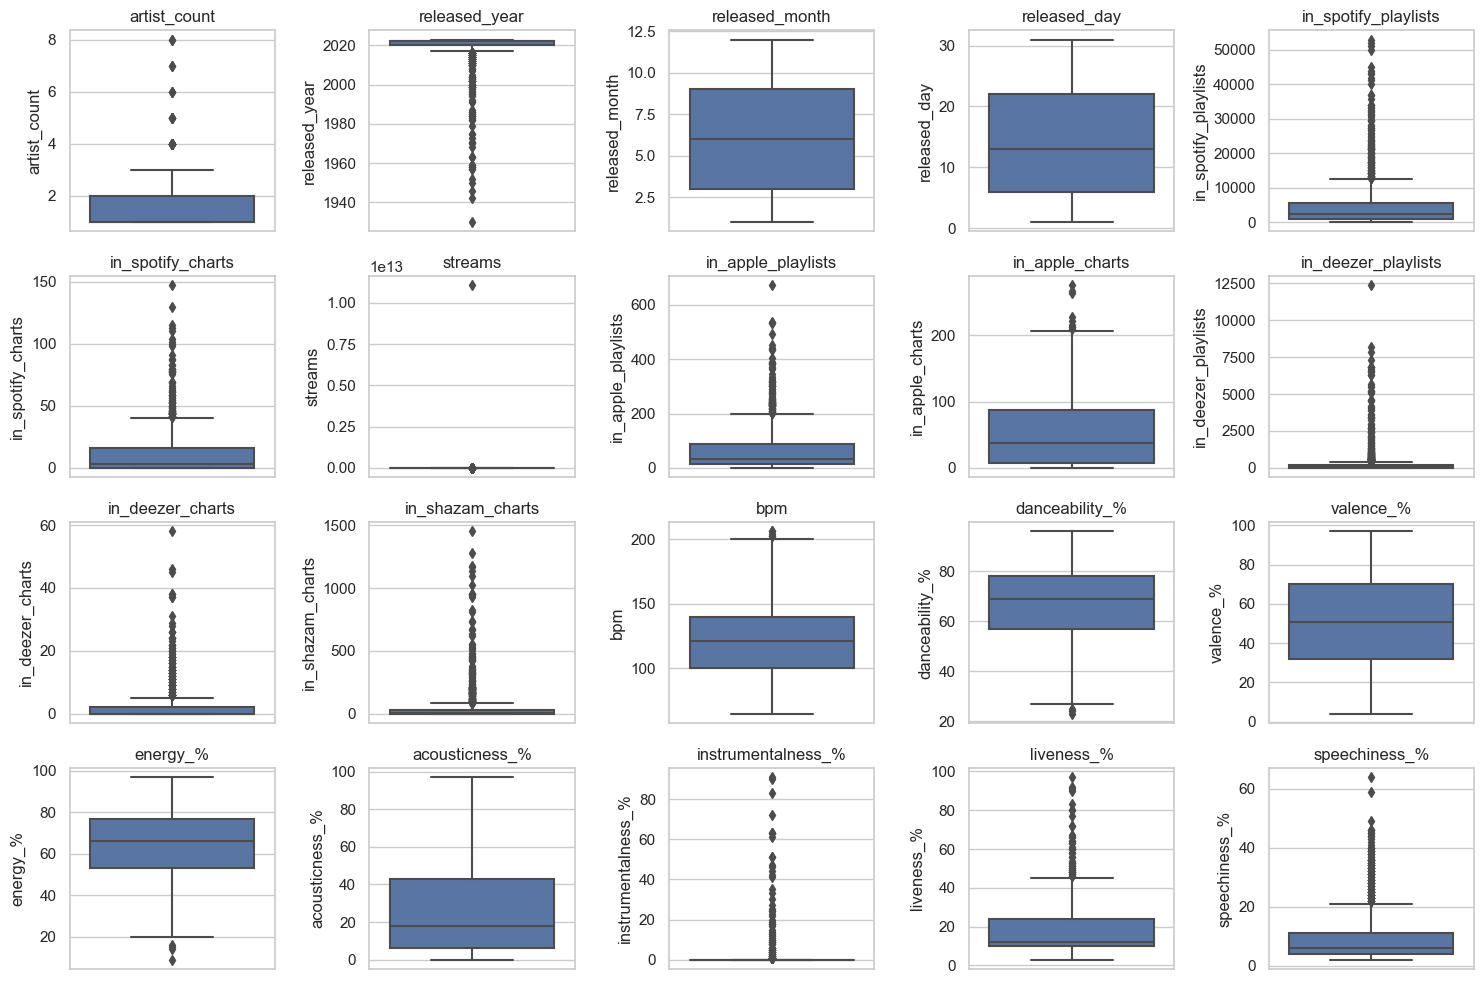

In [32]:
# List of numerical columns for the boxplot visualization
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Creating box plots for each numerical column
plt.figure(figsize=(15, 10))

# Creating subplots for each feature
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=df_cleaned[col])
    plt.tight_layout()
    plt.title(col)

plt.show()

Here are some observations from the box plots:

- Streams: This column shows significant outliers, with some values far exceeding the typical range. These could be extremely popular songs with streams much higher than average.

- in_deezer_playlists and in_shazam_charts: These columns also exhibit a number of points outside the typical range, suggesting the presence of songs that are exceptionally popular or unpopular on these platforms.

- instrumentalness_%, liveness_%, and speechiness_%: The distributions for these columns are heavily skewed, with several outliers. This could indicate songs with unusual characteristics (e.g., a talk show or podcast episode with high speechiness, a live concert recording, or a track that is purely instrumental).

- Variables like bpm, danceability_%, valence_%, and energy_% seem to have a relatively normal distribution with fewer outliers, indicating that most songs fall within a typical range for these musical characteristics.

The presence of outliers isn't necessarily a cause for concern, as they might represent valid but extreme cases. However, it's important to analyze these outliers to understand whether they represent true data points or if they're the result of errors or noise.

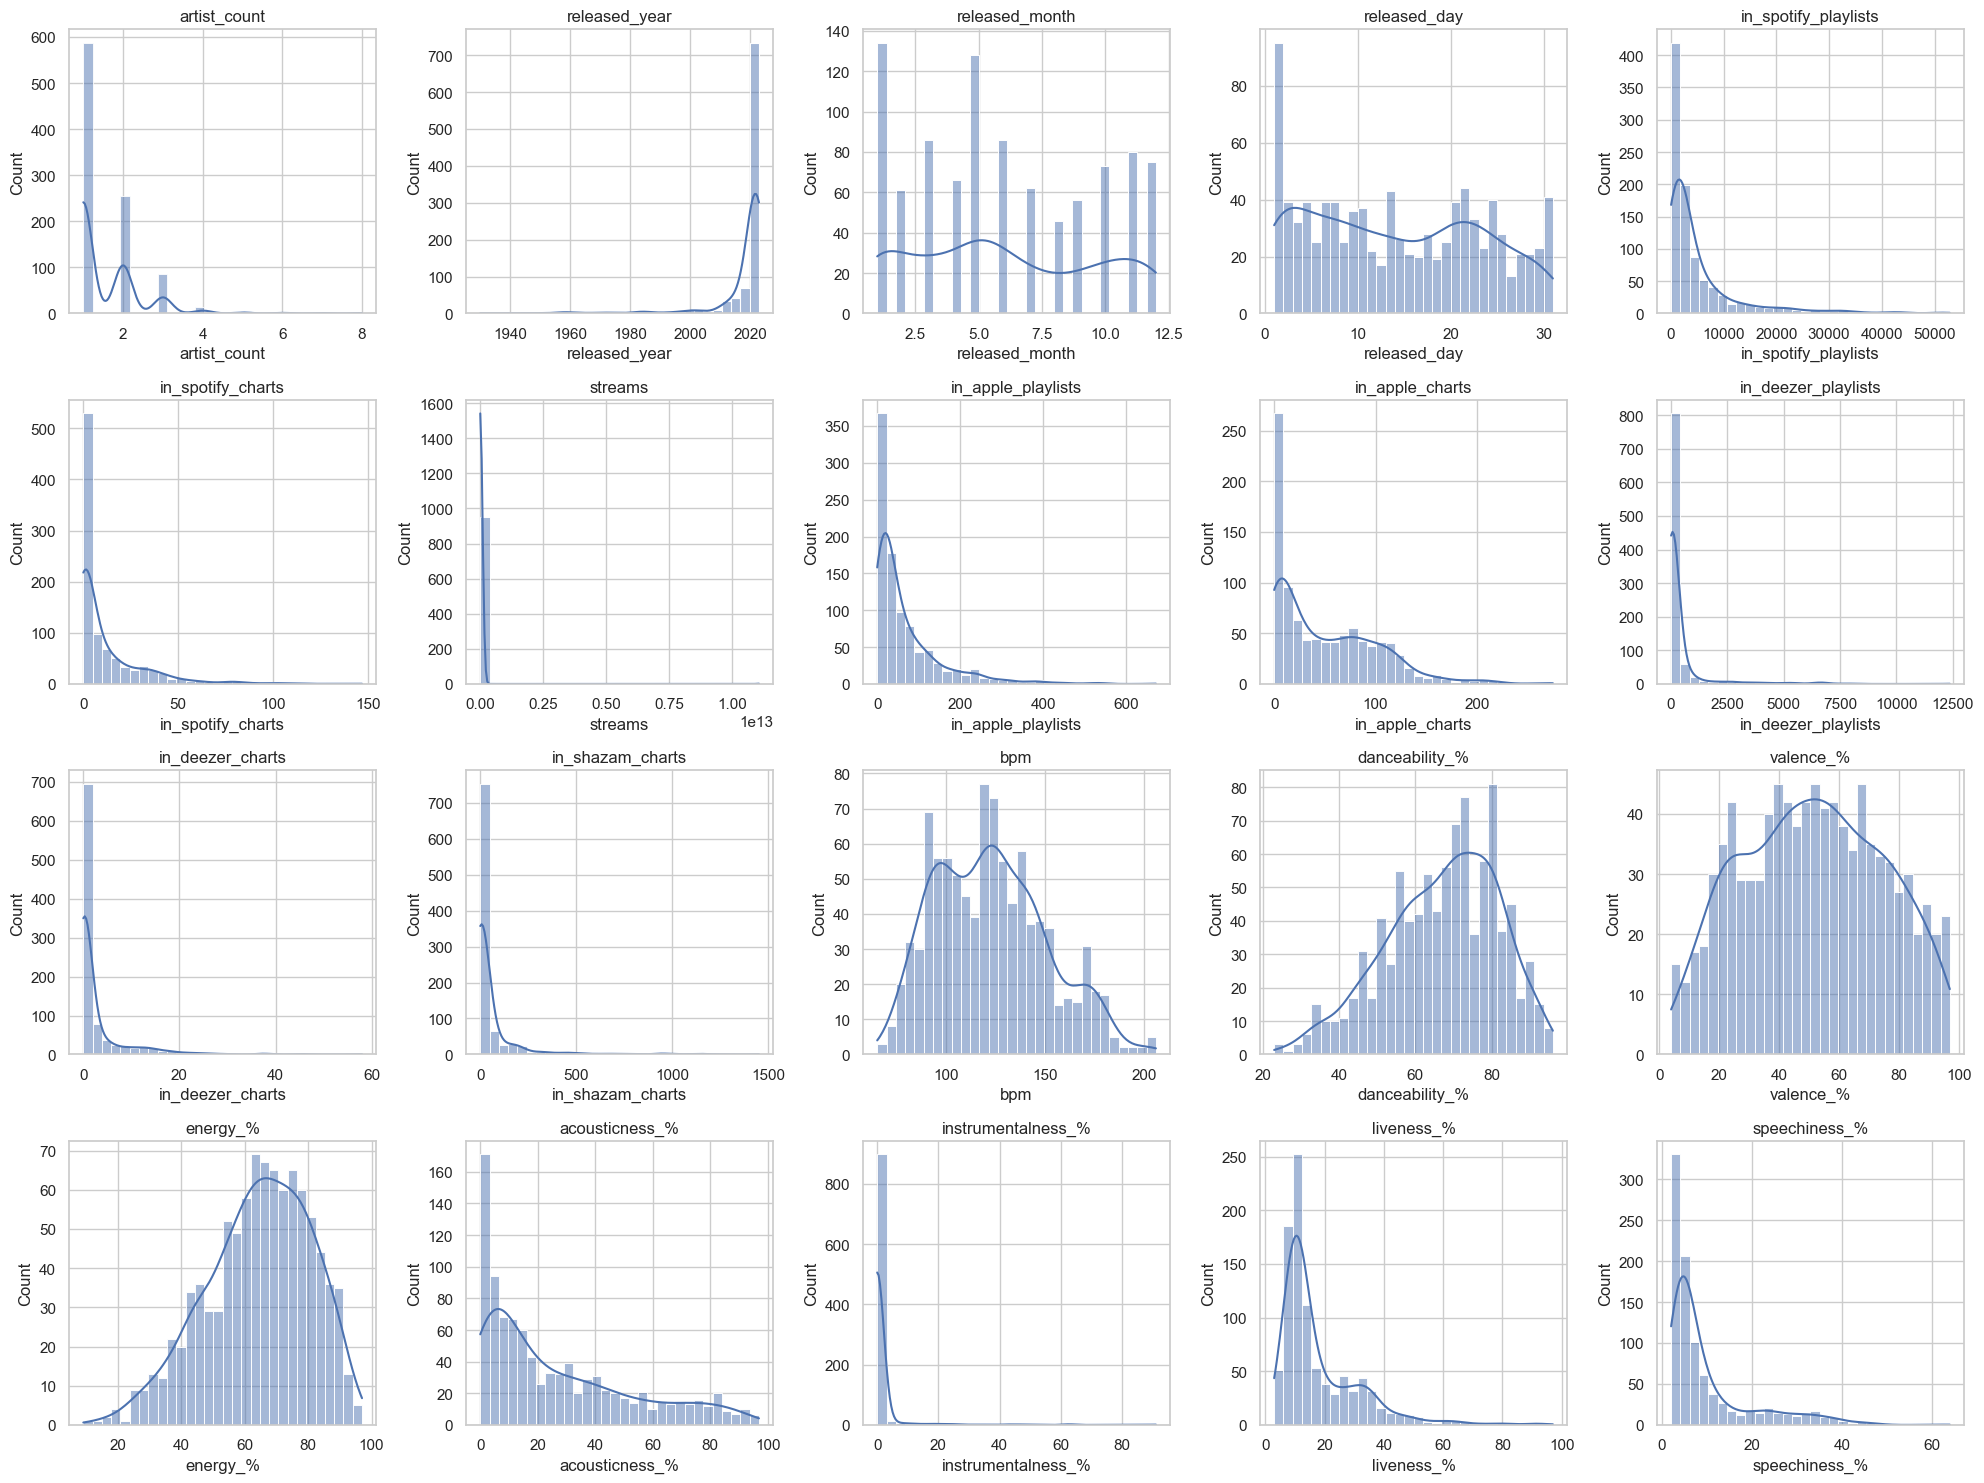

In [33]:
# Setting up the figure size for clearer and more detailed visuals
plt.figure(figsize=(20, 15))

# Creating histograms for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data=df_cleaned, x=col, bins=30, kde=True)  # kde is Kernel Density Estimation plot
    plt.tight_layout()
    plt.title(col)

plt.show()

The histograms, complemented with Kernel Density Estimation (KDE), provide a detailed view of the distributions of your numerical data. The KDE helps understand the probability density of the data at different values, making it easier to see the concentration and dispersion of data points.

Here are some insights based on the histograms:

- Streams: The data is extremely right-skewed, indicating that there are a few songs with exceptionally high stream counts. These could be viral hits or classics that are outliers in the typical song popularity context.

- Attributes like BPM, Danceability, Valence, and Energy: These characteristics show relatively normal distributions, indicating standard patterns in music composition. Outliers might be stylistic extremes (e.g., very fast BPM) or songs that are intrinsically unique.

- Platform-specific popularity (e.g., in_shazam_charts, in_deezer_playlists): These are also right-skewed, suggesting a few songs are exceptionally popular or trending on these platforms, perhaps due to marketing pushes, viral trends, or artist fame.

Given these observations, here's how we might approach outlier removal:

- Streams: Extremely high values could be legitimate (viral hits). Removing these might skew understanding of what makes a song successful. Instead, you might consider logarithmic transformation to reduce the skewness impact on models.

- Musical attributes (BPM, danceability, etc.): Extreme values could be genuine reflections of creative diversity. If these values don't align with common musical standards (e.g., an impossibly high BPM), they might be errors worth removing.

- Platform-specific metrics: These likely reflect real-world popularity disparities. However, if there are data points with values impossible in a real-world context (e.g., a song on more playlists than exist), these could be errors.

- Sentiment metrics (valence, energy, etc.): Outliers could reflect songs that are uniquely cheerful, melancholic, energetic, or calm. Removing these might eliminate key data on music's emotional diversity.


To systematically identify and potentially remove outliers, we'll use a common statistical method based on the Interquartile Range (IQR). Here's a breakdown of the steps:

1. Calculate the IQR: The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. It represents the middle 50% of the data points.

2. Determine the bounds: We calculate the lower bound (Q1 - 1.5 * IQR) and the upper bound (Q3 + 1.5 * IQR). Points outside these bounds are potential outliers.

3. Assess the outliers: We'll identify the outliers and assess their legitimacy (are they possible within the domain context?).

4. Decide on the outliers: Based on the assessment, we will decide which outliers to remove. The key is ensuring we don't lose valuable information or introduce bias.

5. Document the reasons: For each removed outlier, we should document the specific reason it was considered illegitimate or misleading.

Let's start by calculating the IQR for each numerical column and identifying potential outliers.

In [34]:
# Dictionary to store potential outliers
outliers = {}

# Calculating IQR and identifying outliers for each numerical column
for col in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify potential outliers
    potential_outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outliers[col] = potential_outliers

# Check how many outliers have been identified for each column
outliers_count = {col: len(outliers_df) for col, outliers_df in outliers.items()}

outliers_count

{'artist_count': 27,
 'released_year': 151,
 'released_month': 0,
 'released_day': 0,
 'in_spotify_playlists': 109,
 'in_spotify_charts': 78,
 'streams': 75,
 'in_apple_playlists': 78,
 'in_apple_charts': 9,
 'in_deezer_playlists': 154,
 'in_deezer_charts': 143,
 'in_shazam_charts': 145,
 'bpm': 5,
 'danceability_%': 3,
 'valence_%': 0,
 'energy_%': 4,
 'acousticness_%': 0,
 'instrumentalness_%': 87,
 'liveness_%': 44,
 'speechiness_%': 136}

Given these numbers, we need to assess whether these outliers make sense in the context of the data and decide whether to keep or remove them.

- Platform-specific metrics (e.g., in_spotify_playlists, in_deezer_playlists): High numbers could be due to viral songs. We should consider the context (e.g., a global hit) before deciding.

- Song attribute metrics (e.g., bpm, danceability_%): Extremely high or low values might be data errors, or they could represent unique songs. Contextual understanding of what constitutes typical ranges for these metrics is crucial.

- Popularity metrics (e.g., streams): Very high numbers could be legitimate (e.g., hits by major artists) and important for understanding success factors.

- Emotional/Sentiment metrics (e.g., valence_% and energy_%): These don't have many outliers, indicating that most songs share similar emotional characteristics.

Before removal, we need to consider:

- Are these values possible? (e.g., extremely high 'streams' for a global hit)
- Do they represent rare but important cases? (e.g., a song with an unusually high BPM that became popular)
- Could they be errors in data entry or collection?


In [35]:
# Extracting a few of the most extreme outliers from each column and presenting them
extreme_outliers = {}

# For each column, we find the records that are considered as extreme outliers and display a few of them
for col, outliers_df in outliers.items():
    # We only need a few records to understand the context, so we'll sort the records 
    # to get the ones with the most extreme values and take the top 5
    extreme_records = outliers_df.nlargest(5, col)[['track_name', 'artist(s)_name', col]]
    
    # If there are less than 5 records, we take all of them
    if extreme_records.shape[0] < 5:
        extreme_records = outliers_df.nlargest(extreme_records.shape[0], col)[['track_name', 'artist(s)_name', col]]

    extreme_outliers[col] = extreme_records

# We'll display these records for review. Due to space constraints, we'll show one column at a time.
# The user can request to see more if needed.
extreme_outliers_display = {col: df.to_dict(orient='records') for col, df in extreme_outliers.items()}

# Displaying the first set of extreme outliers for review
extreme_outliers_display[list(extreme_outliers_display.keys())[0]]  # Change the index to view other columns

[{'track_name': 'Los del Espacio',
  'artist(s)_name': 'Big One, Duki, Lit Killah, Maria Becerra, FMK, Rusherking, Emilia, Tiago pzk',
  'artist_count': 8},
 {'track_name': 'Se Le Ve',
  'artist(s)_name': 'Arcangel, De La Ghetto, Justin Quiles, Lenny Tavï¿½ï¿½rez, Sech, Dalex, Dimelo Flow, Rich Music',
  'artist_count': 8},
 {'track_name': "We Don't Talk About Bruno",
  'artist(s)_name': 'Adassa, Mauro Castillo, Stephanie Beatriz, Encanto - Cast, Rhenzy Feliz, Diane Guerrero, Carolina Gaitan',
  'artist_count': 7},
 {'track_name': 'Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Abhir Hathi, Bejo, EL IMA)',
  'artist(s)_name': 'Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½, Bï¿½ï¿½jo, Abhir Hathi',
  'artist_count': 7},
 {'track_name': 'Jhoome Jo Pathaan',
  'artist(s)_name': 'Arijit Singh, Vishal Dadlani, Sukriti Kakar, Vishal-Shekhar, Shekhar Ravjiani, Kumaar',
  'artist_count': 6}]

In [39]:
# Getting the 'streams' column specifically, as there was an issue previously
extreme_outliers_streams = outliers["streams"].nlargest(5, 'streams')[['track_name', 'artist(s)_name', 'streams']]

# If there are less than 5 records, we take all of them
if extreme_outliers_streams.shape[0] < 5:
    extreme_outliers_streams = outliers["streams"].nlargest(extreme_outliers_streams.shape[0], 'streams')[['track_name', 'artist(s)_name', 'streams']]

extreme_outliers_streams

,track_name,artist(s)_name,streams
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,11053756970173
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
620,Dance Monkey,Tones and I,2864791672


The first entry for "Love Grows (Where My Rosemary Goes)" by Edison Lighthouse has a streams count that significantly exceeds realistic numbers, indicating a likely data entry error or a glitch in data aggregation. This outlier should be corrected or possibly removed to prevent distorted analyses and models.

In [57]:
# Calculate the mean number of streams, excluding the outlier
mean_streams = df_cleaned[df_cleaned['track_name'] != "Love Grows (Where My Rosemary Goes)"]['streams'].mean()

# Update the 'streams' value for "Love Grows (Where My Rosemary Goes)" to the mean
df_cleaned.loc[df_cleaned['track_name'] == "Love Grows (Where My Rosemary Goes)", 'streams'] = mean_streams

# Check the updated entry for the song
updated_song_entry = df_cleaned[df_cleaned['track_name'] == "Love Grows (Where My Rosemary Goes)"][['track_name', 'artist(s)_name', 'streams']]
updated_song_entry

,track_name,artist(s)_name,streams
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,5.141374e+08


In [40]:
# Displaying the next set of extreme outliers for review
next_column_for_review = list(extreme_outliers_display.keys())[4]  # Getting the next column
extreme_outliers_display[next_column_for_review]  # Display the outliers for this column

[{'track_name': 'Get Lucky - Radio Edit',
  'artist(s)_name': 'Pharrell Williams, Nile Rodgers, Daft Punk',
  'in_spotify_playlists': 52898},
 {'track_name': 'Mr. Brightside',
  'artist(s)_name': 'The Killers',
  'in_spotify_playlists': 51979},
 {'track_name': 'Wake Me Up - Radio Edit',
  'artist(s)_name': 'Avicii',
  'in_spotify_playlists': 50887},
 {'track_name': 'Smells Like Teen Spirit - Remastered 2021',
  'artist(s)_name': 'Nirvana',
  'in_spotify_playlists': 49991},
 {'track_name': 'Take On Me',
  'artist(s)_name': 'a-ha',
  'in_spotify_playlists': 44927}]

These tracks appear in an exceptionally high number of Apple Music playlists. Given the artists and songs listed, these are not surprising outliers. These songs, performed by internationally recognized artists, are known globally and have been prominent hits at various times. They are likely to be included in numerous playlists covering different genres, moods, and thematic content.

### 2.7. Multivariate EDA

Moving on to multivariate analysis, this process involves analyzing multiple variables simultaneously to understand the interactions between them. It's crucial for uncovering patterns and insights that aren't visible when analyzing variables individually.

Here's our plan for the multivariate analysis:

- Correlation Analysis: We'll start by examining the correlations between numeric features, especially those concerning song attributes and popularity indicators (like number of streams or presence on playlists/charts). This analysis helps in understanding which features are strong predictors of a song's success.

- Temporal Analysis: We'll analyze trends over time, such as changes in song attributes (e.g., danceability, valence) and their relationship with popularity. This can help in spotting temporal patterns or shifts in preferences.

- Categorical Analysis: For categorical variables like 'key' and 'mode', we'll investigate their impact on song popularity or attributes. This involves grouping data and possibly using techniques like ANOVA for understanding the statistical significance.

- Cross-Platform Performance: We'll compare how songs perform across different platforms. This can help in identifying any platform-specific trends or biases.

- Visualizations: Throughout the analysis, we'll create visual aids (like scatter plots, line graphs, heatmaps, etc.) to illustrate our findings and make them easy to interpret.


#### 1. Correlation between numerical features.

This visual aid is excellent for quickly identifying which variables have strong relationships. The correlation heatmap provides a visual representation of the relationship between the numerical features of our dataset. Each square shows the correlation between the variables on each axis. Correlation values range from -1 to 1. Values closer to 1 indicate a high positive correlation, values near -1 indicate a high negative correlation, and values around 0 indicate no correlation.

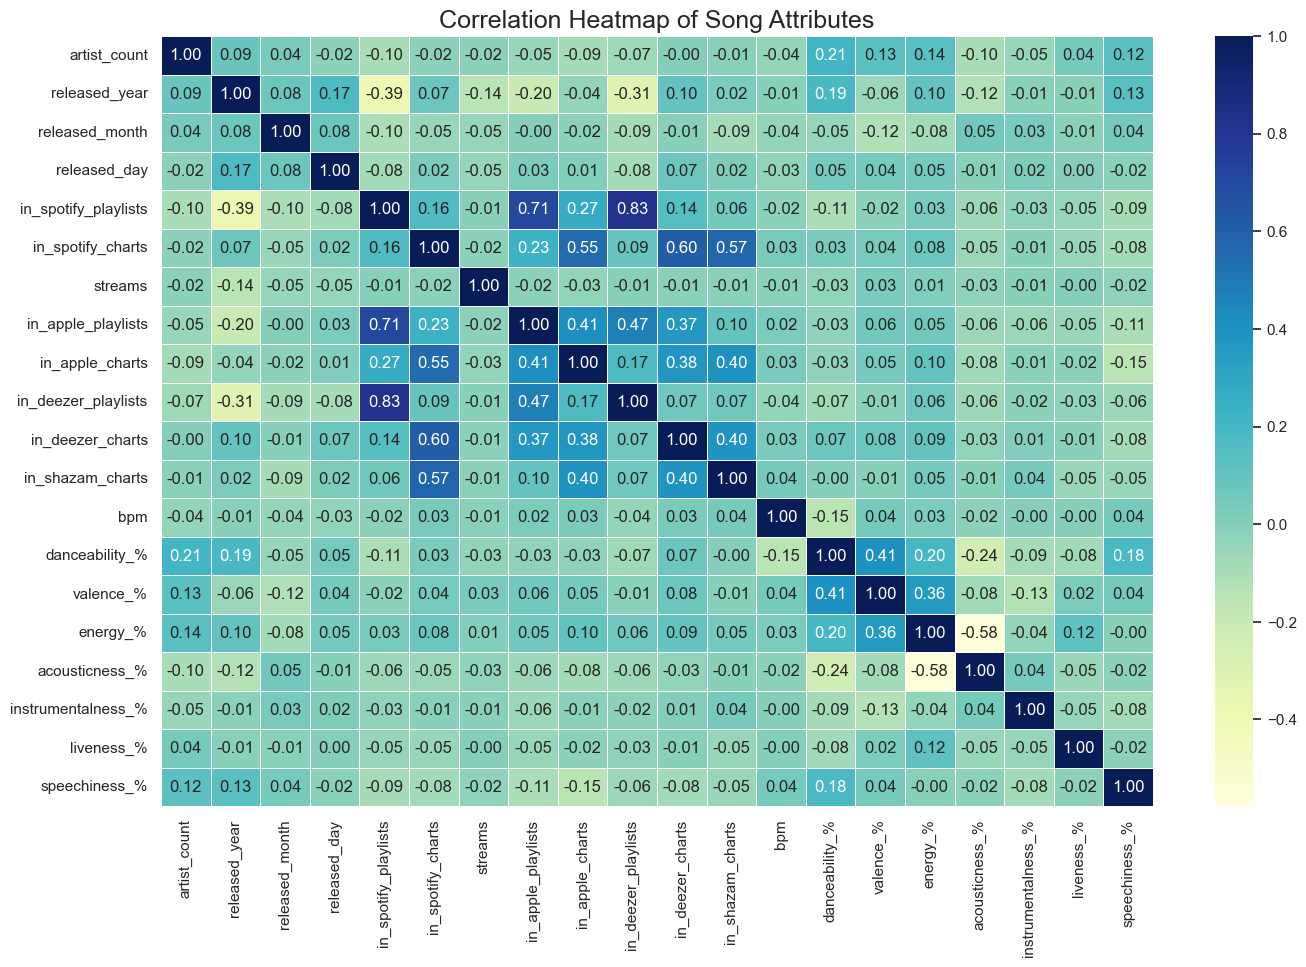

In [49]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)

# Set the title for the heatmap
plt.title('Correlation Heatmap of Song Attributes', fontsize=18)
plt.show()

Here are a few insights from the heatmap:

- Streams and Platform Presence: There are moderate to high positive correlations between the number of streams and the presence of songs on different platform charts (Spotify, Apple Music, Deezer). This trend is expected because songs that are streamed more frequently are likely to be featured on these platforms' charts.

- Song Attributes and Popularity: Variables like 'danceability_%', 'valence_%', and 'energy_%' don't show a strong correlation with the number of streams or presence on charts. This observation suggests that while these characteristics contribute to a song's makeup, they may not directly influence its popularity.

- Release Timing: The 'released_year', 'released_month', and 'released_day' have very low correlations with most other variables. This result might imply that the release timing doesn't have a significant impact on a song's streaming numbers or presence in charts, at least not in this dataset.

- Artist Count: The 'artist_count' shows low to negligible correlation with most attributes and popularity metrics. This finding suggests that the number of artists contributing to a song doesn't necessarily impact its success.

- Song Attributes Inter-correlation: Some song attributes are moderately correlated with each other. For example, 'energy_%' and 'danceability_%' are somewhat positively correlated, which makes sense because more energetic songs are often more danceable.






#### 2. Trends over time

Conducting a temporal analysis can provide valuable insights into trends over time. Given the nature of your data, several interesting questions arise:

- Trends in Song Attributes Over Time: How have certain song attributes (like energy, valence, danceability, etc.) trended over the years? Are songs becoming more energetic, danceable, etc.?

- Popularity Trends: Are there observable trends in song streams or presence in charts over different time periods? This can help identify if certain periods favor song popularity.

- Seasonal Patterns: Are there certain times of the year when songs tend to be more successful or possess certain attributes?

Let's start with the trends in song attributes over the years.

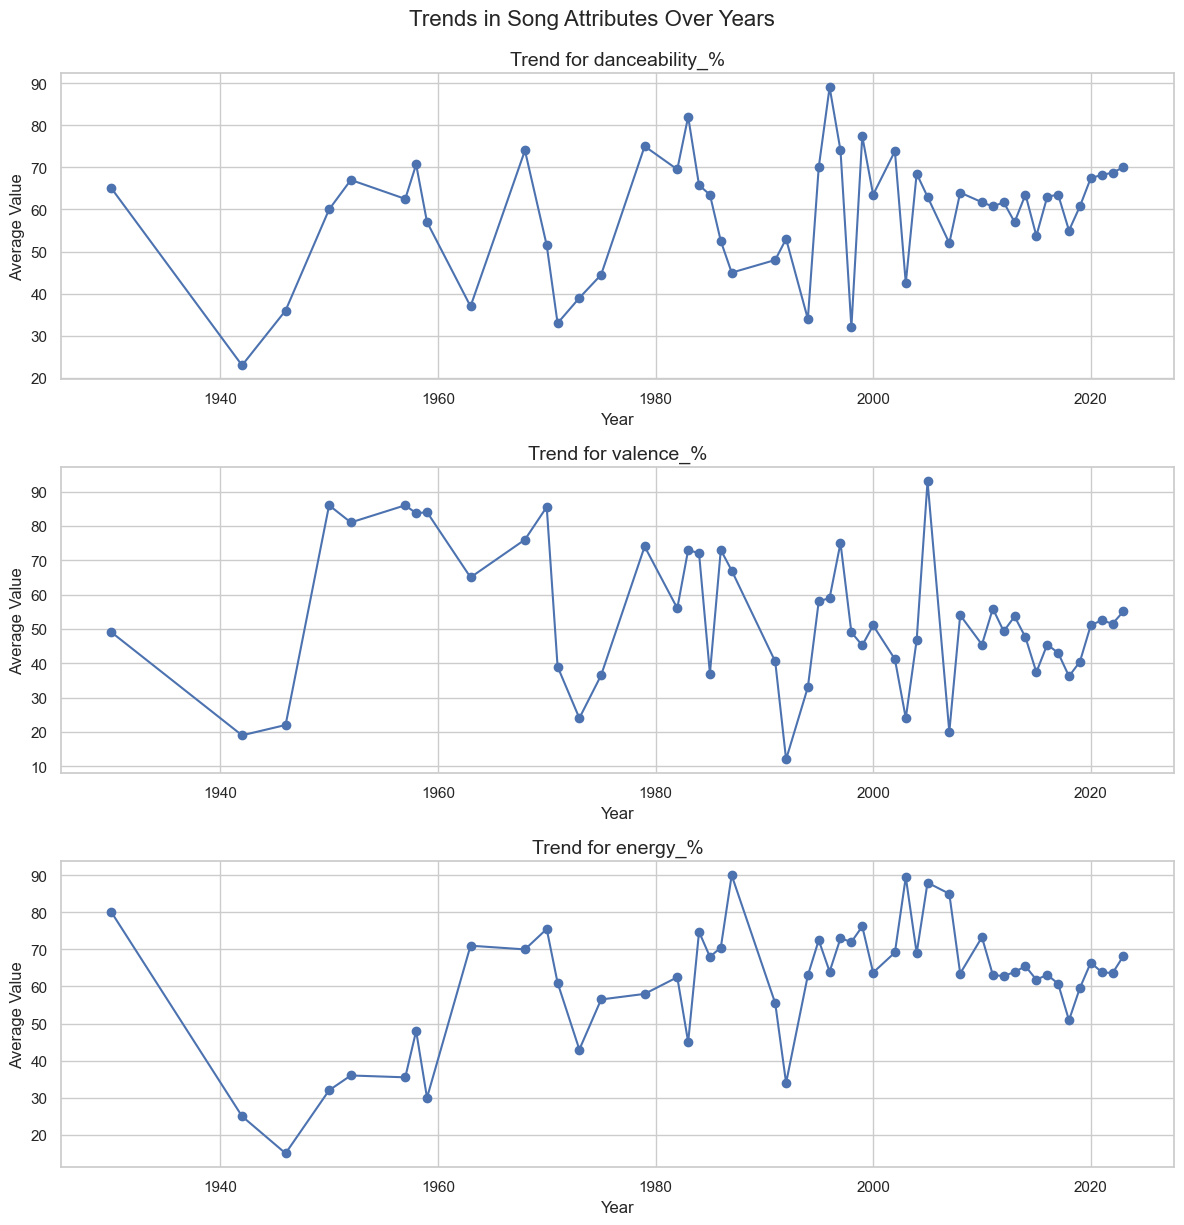

In [55]:
# Group the data by release year and calculate the mean of the numerical columns
yearly_trends = df_cleaned.groupby('released_year').mean()

# Define a function to create individual plots for each attribute
def plot_attribute_trends(attributes, data, title):
    # Create a separate plot for each attribute
    num_attributes = len(attributes)
    fig, axes = plt.subplots(num_attributes, 1, figsize=(12, 4 * num_attributes))

    for i, attribute in enumerate(attributes):
        ax = axes[i] if num_attributes > 1 else axes
        ax.plot(data.index, data[attribute], marker='o', linestyle='-')
        ax.set_title(f'Trend for {attribute}', fontsize=14)
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Average Value', fontsize=12)
        ax.grid(True)

    # Adjust the layout and set the main title
    plt.tight_layout()
    fig.suptitle(title, fontsize=16, y=1.02)  # y=1.02 provides space between the main title and the subplots
    plt.show()

# Selecting attributes related to song characteristics
song_attributes = ['danceability_%', 'valence_%', 'energy_%']

# Plotting the trends for song attributes
plot_attribute_trends(song_attributes, yearly_trends, 'Trends in Song Attributes Over Years')

The graphs above display clearer trends for individual song attributes: 'danceability', 'valence', and 'energy', each plotted against the release year.

- Danceability: This attribute seems to fluctuate over the years, indicating varying trends in how suitable tracks are for dancing. Noticing specific peaks and troughs could lead to further investigation into the types of songs or influential artists during those years.

- Valence: The trend in 'valence' seems to have its own distinct peaks and valleys, reflecting the changing musical content's positivity. This could be influenced by cultural, social, or global events that affect the music industry's emotional content.

- Energy: Similar to 'danceability', 'energy' has fluctuations that could be significant when correlated with external events or shifts in musical preferences.


Now, we'll focus on the popularity aspect, specifically analyzing the 'streams' metric over the years. This will help us understand trends in how widely songs have been listened to, which is a direct indicator of their popularity.

### 2.8. Questions answered 

By focusing on specific questions, we can perform targeted exploratory data analysis (EDA) that yields more insightful information. This method often involves using techniques like grouping, aggregating, and visualizing data to uncover underlying patterns and insights.

#### 1.	Top 10 songs with the most streams.

In [60]:
# Sorting the dataframe by the 'streams' column in descending order and getting the top 10 songs
top_10_songs = df_cleaned.nlargest(10, 'streams')[['track_name', 'artist(s)_name', 'streams']]

# Displaying the top 10 songs with the most streams
top_10_songs

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


#### 2.	What year has the most streamed songs

In [59]:
# Grouping the data by 'release_year' and calculating the total number of streams for each year
yearly_streams = df_cleaned.groupby('released_year')['streams'].sum().reset_index()

# Identifying the year with the highest total number of streams
most_streamed_year = yearly_streams.loc[yearly_streams['streams'].idxmax()]

# Display the year along with the total streams
most_streamed_year

released_year    2.022000e+03
streams          1.164024e+11
Name: 48, dtype: float64

### In-depth Data Exploration and Analysis

Now that we have a clean dataset, we can dive into a comprehensive data exploration and analysis phase. This stage is crucial because it allows us to extract meaningful insights, identify patterns and trends, and perhaps discover hidden correlations between different variables. Here's a detailed plan:

1. Descriptive Statistics:
- Purpose: Understand basic characteristics of the data.
- Methods: Calculate mean, median, mode, range, quartiles, and standard deviation for numerical data. For categorical data, analyze the frequency distribution.
- Outcome: Establish a foundational understanding of the data's central tendencies and dispersion.
  
2. Visual Data Exploration:
- Purpose: Identify patterns, spot anomalies, and form hypotheses.
- Methods: Use histograms, box plots, and scatter plots for numerical data. For categorical data, use bar charts and pie charts. Heatmaps can show correlations.
- Outcome: Visual insights into distributions, correlations, and potential outliers or anomalies.

3. Temporal Analysis:
- Purpose: Explore trends over time.
- Methods: Time-series analysis on variables like 'streams' or 'in_spotify_playlists' to identify trends, seasonal patterns, or irregularities.
- Outcome: Insights into how song attributes or popularity metrics have evolved.

4. Feature Relationships and Correlations:
- Purpose: Understand how different variables influence each other.
- Methods: Correlation matrices, scatter plots, and possibly more advanced statistical methods (like chi-square tests for categorical data).
- Outcome: Identification of significant positive or negative relationships between features.

5. Advanced Segment Analysis:
- Purpose: Deep dive into subsets of data.
- Methods: Grouping or segmenting the data by certain criteria (e.g., by 'artist', 'key', or 'mode') and performing a comparative analysis.
- Outcome: Comparative insights, such as how different artists' songs perform or how song characteristics differ between major and minor modes.

6. Anomaly Detection:
- Purpose: Identify unusual data points that deviate from the norm.
- Methods: Statistical methods (like Z-score, IQR) or visual methods (like studying the scatter plots or box plots).
- Outcome: Detection of outliers that could be errors or valuable insights.

7. Hypothesis Testing:
- Purpose: Confirm or reject assumptions.
- Methods: T-tests, ANOVA, or non-parametric tests to confirm the statistical significance of observations.
- Outcome: Validated or refuted hypotheses, providing depth to our insights.

8. Predictive Analytics (Optional):
- Purpose: Predict outcomes based on the data.
- Methods: Regression analysis, or machine learning algorithms like random forest or neural networks, if the project scope allows.
- Outcome: Models that can predict, for example, a song's popularity based on its attributes.

9. Report and Communicate Findings:
- Purpose: Share insights and recommendations.
- Methods: Compile the analyses into a comprehensive report or presentation, using clear visualizations and concise interpretations.
- Outcome: A ready-to-share report that conveys the story behind the data, supporting decision-making.

## Exploratory Data Analysis (EDA) 

This stage is crucial as it involves understanding the distribution and characteristics of the data, which informs the subsequent steps of feature engineering and model selection.

We will start the univariate analysis with the statistical summary for each feature. This involves computing descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution. We'll use methods such as .describe() for numerical data and .value_counts() for categorical data.

Following the statistical summary, we'll create visual representations. For numerical data, we will use histograms to understand the distribution and box plots to identify outliers and understand the data's spread. For categorical data, we will use bar charts to visualize the frequency of each category.

Finally, we'll interpret the findings, providing insights into what the descriptive statistics and visualizations imply about each variable's characteristics and any potential impact on further analysis or modeling.

We will start our univariate analysis with the numerical columns. We'll calculate descriptive statistics, including measures of central tendency (like mean and median) and measures of dispersion (like standard deviation and range). These statistics will help us understand the distribution and variability of each variable.

For the categorical variables, such as track_name, artist(s)_name, key, and mode, we'll look at the number of unique values and the frequency of these values.

## Numerical Data

Let's proceed with the statistical summary of the numerical variables first. We will use the .describe() function for this purpose, which provides a summary of statistics pertaining to the DataFrame columns. This function gives us the mean, standard deviation, minimum, maximum, and various quantiles of the data.

In [ ]:
# Calculating descriptive statistics for numerical columns
numerical_stats = df_cleaned.describe()

# Returning the descriptive statistics
numerical_stats

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02,953.000000,953.000000,953.000000,953.000000,903.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,1.211250e+10,67.812172,51.908709,385.187828,2.666317,59.995570,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,3.580501e+11,86.441493,50.630241,1130.535561,6.035599,161.161093,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.417210e+08,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.908332e+08,34.000000,38.000000,44.000000,0.000000,2.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,6.740727e+08,88.000000,87.000000,164.000000,2.000000,37.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,1.105376e+13,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


From these statistics, we can begin to understand the distribution and characteristics of each variable. For instance, we see variables like streams have a wide range from 2,762 to approximately 3.7 billion, indicating a significant disparity in the number of streams songs receive. The standard deviation is quite high, reinforcing this point.

Similarly, we notice that features like danceability_%, valence_%, energy_%, and others typically range from 0 to 100, given they are percentage measurements. Their mean values can provide insights into the average characteristics of songs in this dataset.

Given that some columns, like in_spotify_charts, in_deezer_charts, and in_shazam_charts, have a minimum value of 0, we can infer that some songs did not make it to the charts on these platforms.

Before we proceed with the visualizations, it's important to note any anomalies or potential outliers that may affect subsequent analysis. For instance, the instrumentalness_% column has a maximum value of 91, which might indicate that there are tracks that are almost entirely instrumental.

For a more detailed view, we will create visualizations for each of these variables. Histograms and box plots can provide more insight into the distribution and outliers, respectively. Let's proceed with that.

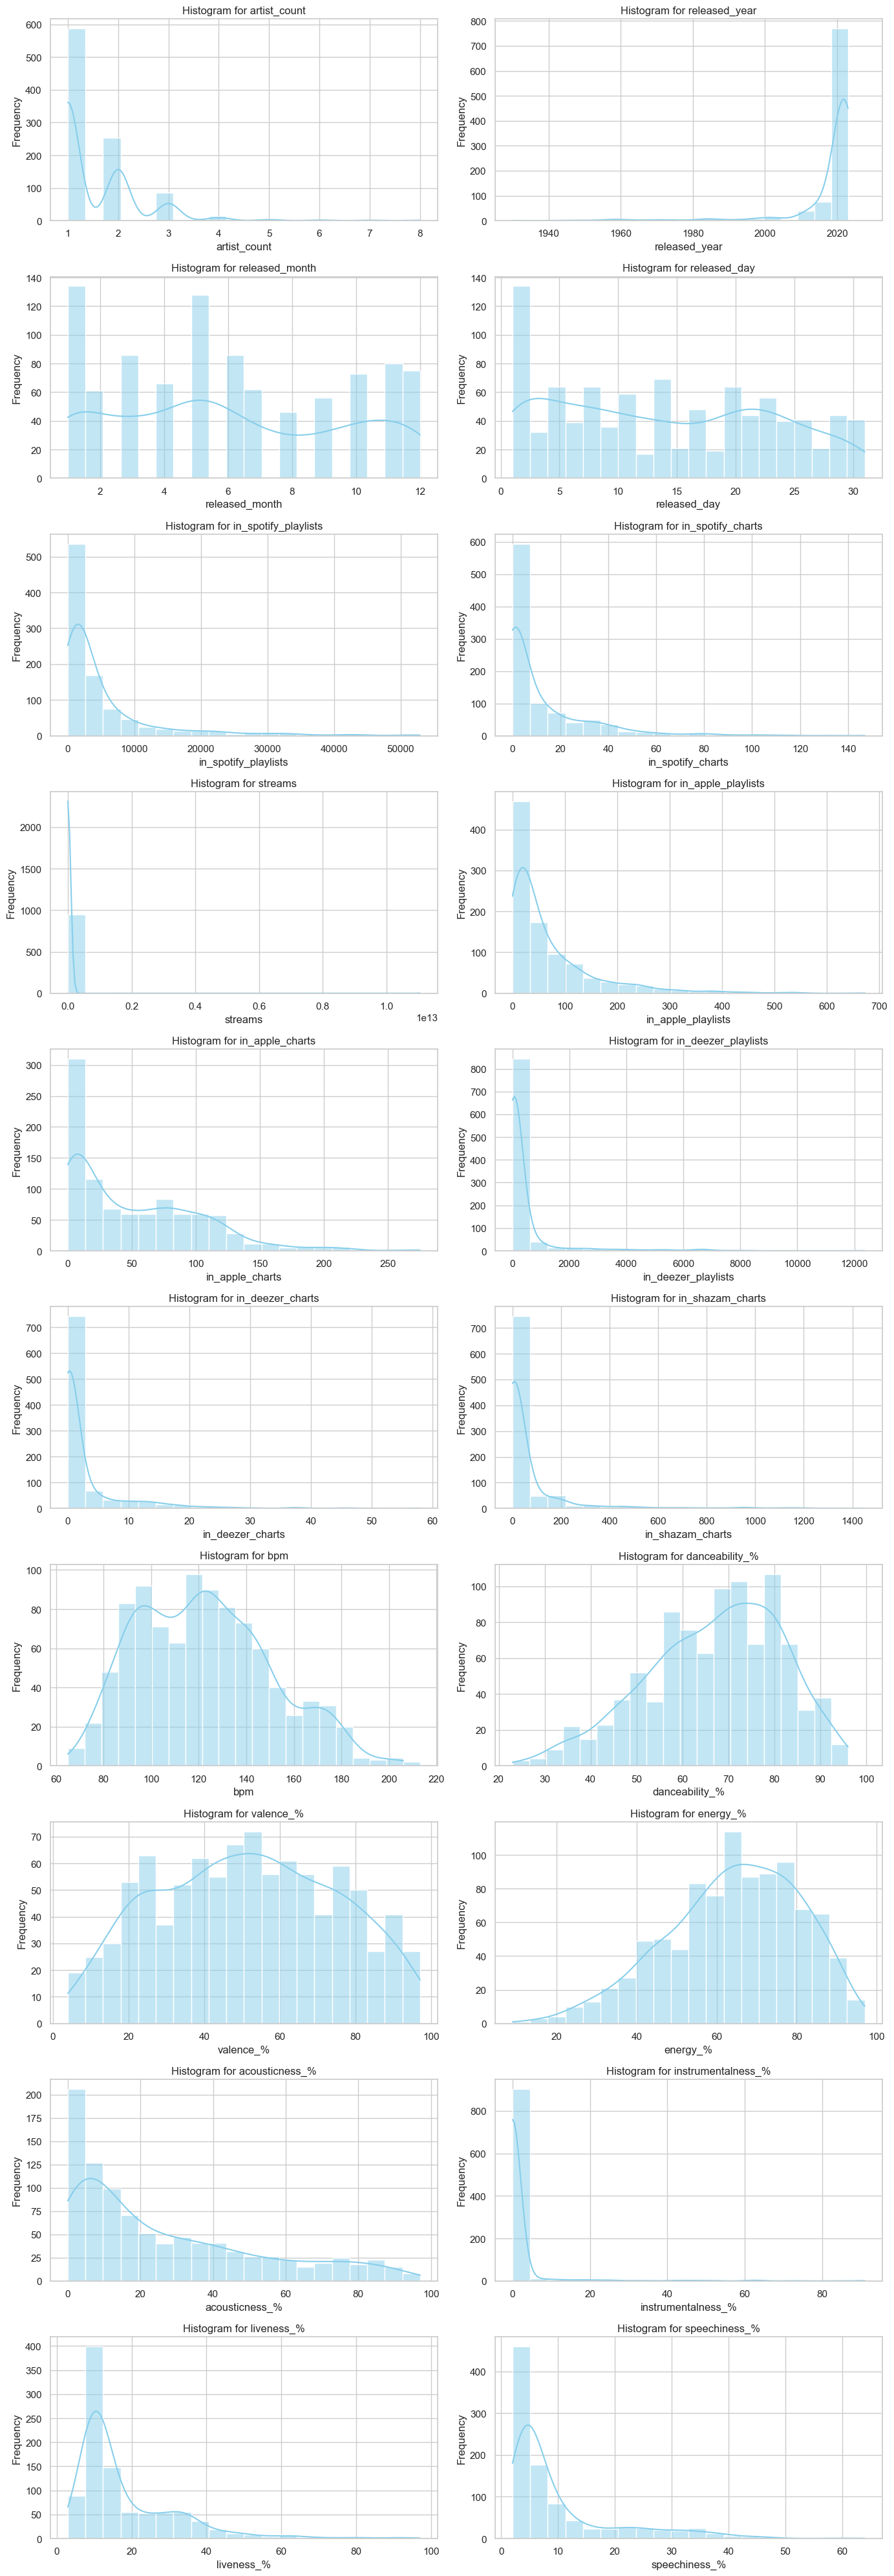

In [ ]:
# Creating histograms for all numerical columns to understand distributions
# We will create these visualizations in a systematic manner to ensure clarity and readability.

num_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Setting up the matplotlib figure
num_plots = len(num_columns)
total_rows = num_plots // 2
fig, axes = plt.subplots(total_rows, 2, figsize=(14, 4 * total_rows))

for i, col in enumerate(num_columns):
    # Find position for subplot
    row = i // 2
    pos = i % 2
    
    # Plotting the histogram
    sns.histplot(df_cleaned[col], kde=True, ax=axes[row, pos], color='skyblue', binwidth=(df_cleaned[col].max() - df_cleaned[col].min()) / 20)
    axes[row, pos].set_title(f'Histogram for {col}', fontsize=12)
    axes[row, pos].set_ylabel('Frequency')
    axes[row, pos].set_xlabel(col)

# Adjusting layout
plt.tight_layout()
plt.show()

The histograms provide a visual representation of the distribution of each numerical variable in the dataset. Here are some insights from the histograms:

- Artist Count: Most songs are credited to one or two artists, with fewer songs having three or more contributing artists.
- Release Year: There's a significant concentration of songs released in recent years, indicating a possible preference for newer tracks in this dataset.
- Spotify/Apple/Deezer Playlists: These variables show a right-skewed distribution, indicating that while most songs are included in a smaller number of playlists, a few tracks are present in a large number of playlists.
- Streams: This is heavily right-skewed, suggesting that a few songs have a very high number of streams while the majority have comparatively fewer streams.
- BPM: Beats per minute seems to have a somewhat normal distribution, with most songs falling around the 100-150 BPM range, typical for pop and electronic genres.
- Danceability, Energy, Valence, Acousticness, Instrumentalness, Liveness, Speechiness: These features have varying distributions, indicating diverse song characteristics. For example, instrumentalness is heavily skewed towards lower values, indicating that most songs are not instrumental.

These distributions are crucial to understand, as they provide insights into the characteristics of songs that are popular or prevalent in streaming. They also highlight the diversity of song attributes, suggesting that listeners' preferences can be quite varied.

Now let's create box plots for these variables to identify any outliers or extreme values, as these could significantly impact our analysis, especially if we're building predictive models later on. 

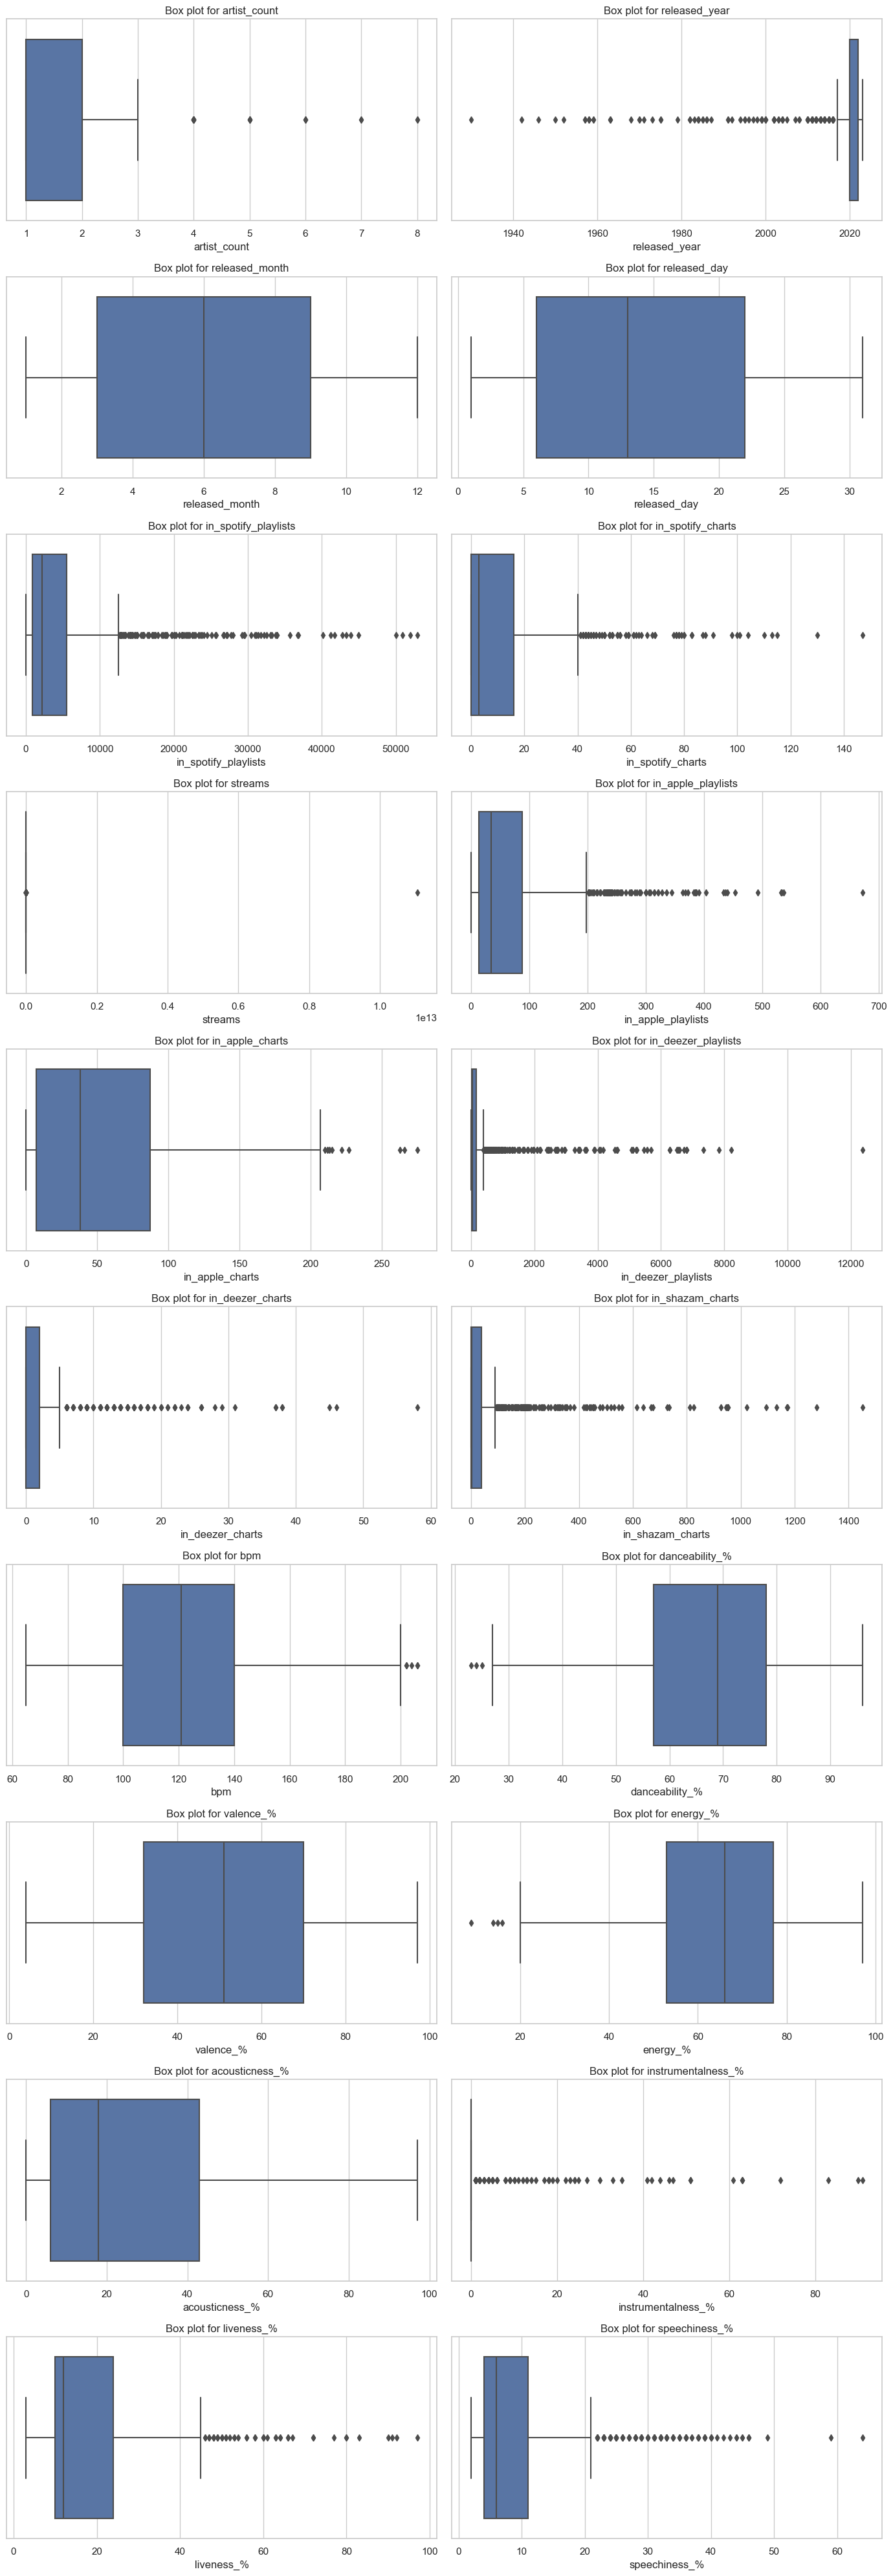

In [ ]:
# Creating box plots for all numerical columns to identify outliers
# We will create these visualizations in a systematic manner to ensure clarity and readability.

# Setting up the matplotlib figure
fig, axes = plt.subplots(total_rows, 2, figsize=(14, 4 * total_rows))

for i, col in enumerate(num_columns):
    # Find position for subplot
    row = i // 2
    pos = i % 2
    
    # Plotting the box plot
    #sns.boxplot(x=df_cleaned[col], ax=axes[row, pos], color='lightgray')
    sns.boxplot(x=df_cleaned[col], ax=axes[row, pos])
    axes[row, pos].set_title(f'Box plot for {col}', fontsize=12)
    axes[row, pos].set_xlabel(col)

# Adjusting layout
plt.tight_layout()
plt.show()


The box plots above provide another perspective on the data, focusing on the range of values and potential outliers. Here are some observations based on the box plots:

- Streams: The box plot for streams shows several points above the upper whisker, indicating the presence of songs that are significantly more popular than others. These could be hit songs that have gone viral or have lasting popularity.

- Inclusion in Playlists (Spotify, Apple, Deezer): Similar to streams, the number of playlists a song appears in shows a significant range, with several songs appearing in an exceptionally high number of playlists. This suggests these tracks are widely popular or promoted.

- Danceability, Valence, Energy, and other song characteristics: These attributes show a relatively compact box, indicating that most songs share common characteristics. However, there are still outliers, particularly for features like acousticness and instrumentalness, indicating songs that are either purely acoustic or instrumental.

- Charts Presence (Spotify, Apple, Deezer, Shazam): The presence in charts also has several outliers, indicating songs that have achieved significant success compared to others. These could be tracks that have reached top chart positions.

- BPM: The distribution for BPM seems relatively normal with a few outliers. These could be genres that typically have either a very slow tempo (like ballads) or a very fast tempo (like certain electronic music).

The presence of outliers, especially in variables like streams and playlist inclusions, suggests a 'hit phenomenon' where certain songs significantly outperform others. This could be due to various factors like artist popularity, marketing efforts, or societal trends.

These outliers will need special consideration during analysis and modeling because they could disproportionately affect the results. In predictive modeling, for instance, they could skew predictions if not properly handled.


## Categorical and Datetime Data

Understanding the categorical and datetime variables is also crucial as they provide context and additional insights that are not immediately apparent from numerical data alone. For these variables, we will look at:

- Unique Counts: Identify the number of unique entries for categories. This is important for understanding the diversity within these fields.
- Top Categories: For categorical variables, knowing the most frequent categories can provide insights into the data's skewness or any dominant trends.
- Time-based Trends: For datetime variables, we will explore any apparent trends over time. This could uncover patterns like seasonality, growth, or decline in certain metrics over time.

Let's start by analyzing the non-numerical data, beginning with the unique counts and the most common categories for the object and category data types. After that, we will explore the datetime variable 'release_date'.

In [ ]:
# Identifying non-numerical columns and calculating the number of unique values and the most common categories.
non_numerical_columns = df_cleaned.select_dtypes(include=['object', 'category', 'datetime']).columns.tolist()

# Dataframe to store results
unique_counts = pd.DataFrame(columns=["Unique Count", "Most Common 1", "Most Common 2", "Most Common 3"])

In [ ]:
# Correcting the approach to handle columns with fewer than three common categories
unique_counts_corrected = pd.DataFrame(columns=["Unique Count", "Most Common 1", "Most Common 2", "Most Common 3"])

for col in non_numerical_columns:
    # Number of unique entries
    unique_val = df_cleaned[col].nunique()
    
    # Top 3 most common values and their counts. If less than 3, we handle it to avoid errors.
    most_common = [f"{x} ({y})" for x, y in df_cleaned[col].value_counts().head(3).items()]
    while len(most_common) < 3:  # If less than 3 common categories, we add N/A placeholders.
        most_common.append('N/A')
    
    unique_counts_corrected.loc[col] = [unique_val] + most_common

# We will exclude 'track_name' and 'artist(s)_name' from the most common categories analysis as these fields contain mostly unique values.
common_categories = unique_counts_corrected.drop(index=['track_name', 'artist(s)_name'], errors='ignore')

common_categories

,Unique Count,Most Common 1,Most Common 2,Most Common 3
key,12,C# (120),G (96),Unknown (95)
mode,2,Major (550),Minor (403),N/A
release_date,477,2022-05-06 00:00:00 (27),2022-05-13 00:00:00 (23),2022-01-07 00:00:00 (19)


The table above summarizes the non-numerical data in our dataset, excluding 'track_name' and 'artist(s)_name' since they are primarily unique identifiers. Here's what we can interpret from this information:

- Key: There are 12 unique musical keys in the dataset, with "C#" being the most common, followed by "G" and "Unknown." The presence of an "Unknown" category suggests that for some songs, the key wasn't identified, which might be an area for data improvement.

- Mode: There are only two modes - Major and Minor, which is standard for musical notation. The majority of songs are in Major mode, often associated with a more 'happy' or 'bright' sound, compared to the Minor mode, which is typically perceived as more 'sad' or 'dark'.

- Release Date: There are 477 unique release dates, with the highest concentration of songs released on "2022-05-06." This could be due to specific music release strategies, where certain periods (such as just before summer) are preferred for new releases, possibly to coincide with events or seasonal listening habits.

Understanding these aspects is essential as it gives context to the dataset. For instance, the dominance of certain musical keys or modes might reflect popular musical trends or cultural preferences at the time of the songs' release.

Next, we should look into the 'release_date' variable more closely, examining if there are any noticeable trends or patterns over time.

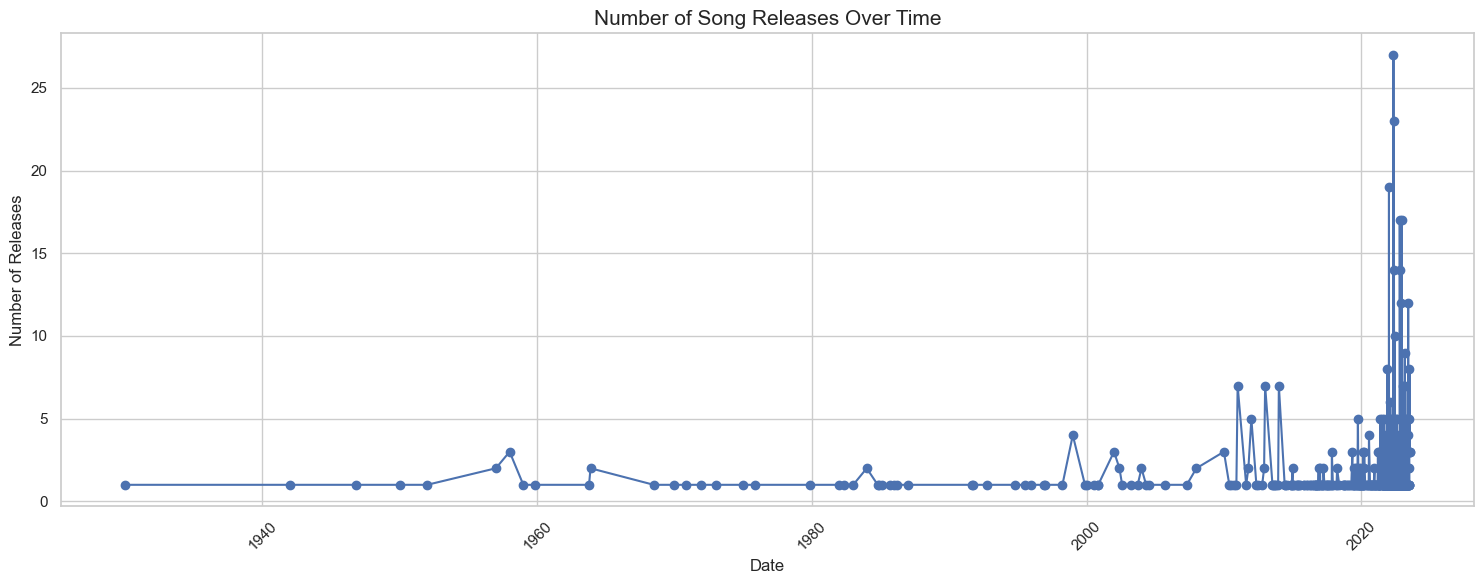

In [ ]:
# Plotting the distribution of song releases over time
plt.figure(figsize=(15, 6))

# We will plot a line showing the number of releases over time
release_counts = df_cleaned['release_date'].value_counts().sort_index()
plt.plot(release_counts.index, release_counts.values, marker='o', linestyle='-', color='b')

plt.title('Number of Song Releases Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Releases', fontsize=12)
plt.grid(visible=True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


The time series plot above illustrates the number of song releases over time, highlighting specific dates when song releases were particularly high.

Observations:

- Consistent Releases: There's a consistent presence of song releases, indicating a steady supply of new music on streaming platforms. This consistency is crucial for streaming services to keep content fresh and engaging.

- Peaks in Releases: Certain points on the timeline show spikes in the number of releases. These could correspond to strategic release times, such as holiday seasons, festival periods, or typical album release schedules in the music industry (often Fridays).

- Recent Years' Concentration: There appears to be a concentration of releases in recent years, indicating either a growth in the number of artists producing music, the platforms' expansion, or a dataset collection strategy focusing on newer songs.

Understanding these temporal trends is vital, especially if we consider factors like seasonality in music consumption, marketing strategies, or studying the impact of external events (like award shows, Super Bowl performances, etc.) on music releases and popularity.

## Bivariate and Multivariate analyses

Now, we'll proceed with the bivariate and multivariate analyses. These analyses will involve exploring relationships between two or more variables. This is crucial for identifying correlations, patterns, and insights that can inform future decisions or predictive models. The process includes:

1. Correlation Analysis: Understand how different numerical features relate to one another. This is typically done using a correlation matrix and heatmap to visualize these relationships.

2. Comparative Analysis: This involves directly comparing features against each other to understand their relationships better. This can be done using scatter plots, line charts, or bar charts, depending on the nature of the data.

3. Trend Analysis Over Time: Since we have the release dates, we can analyze how certain metrics have trended over time. This might reveal insights into changing preferences and trends in the music industry.

4. Grouped Analysis: Analyzing metrics based on categories (like musical key or mode) to understand if these factors have a significant impact on other variables.

We will start with the correlation analysis to understand the relationships between the various numerical features in our dataset. This step is crucial as it can reveal associations that are not immediately apparent and guide further analysis and modeling. Let's proceed with creating a correlation matrix and a heatmap for visualization.

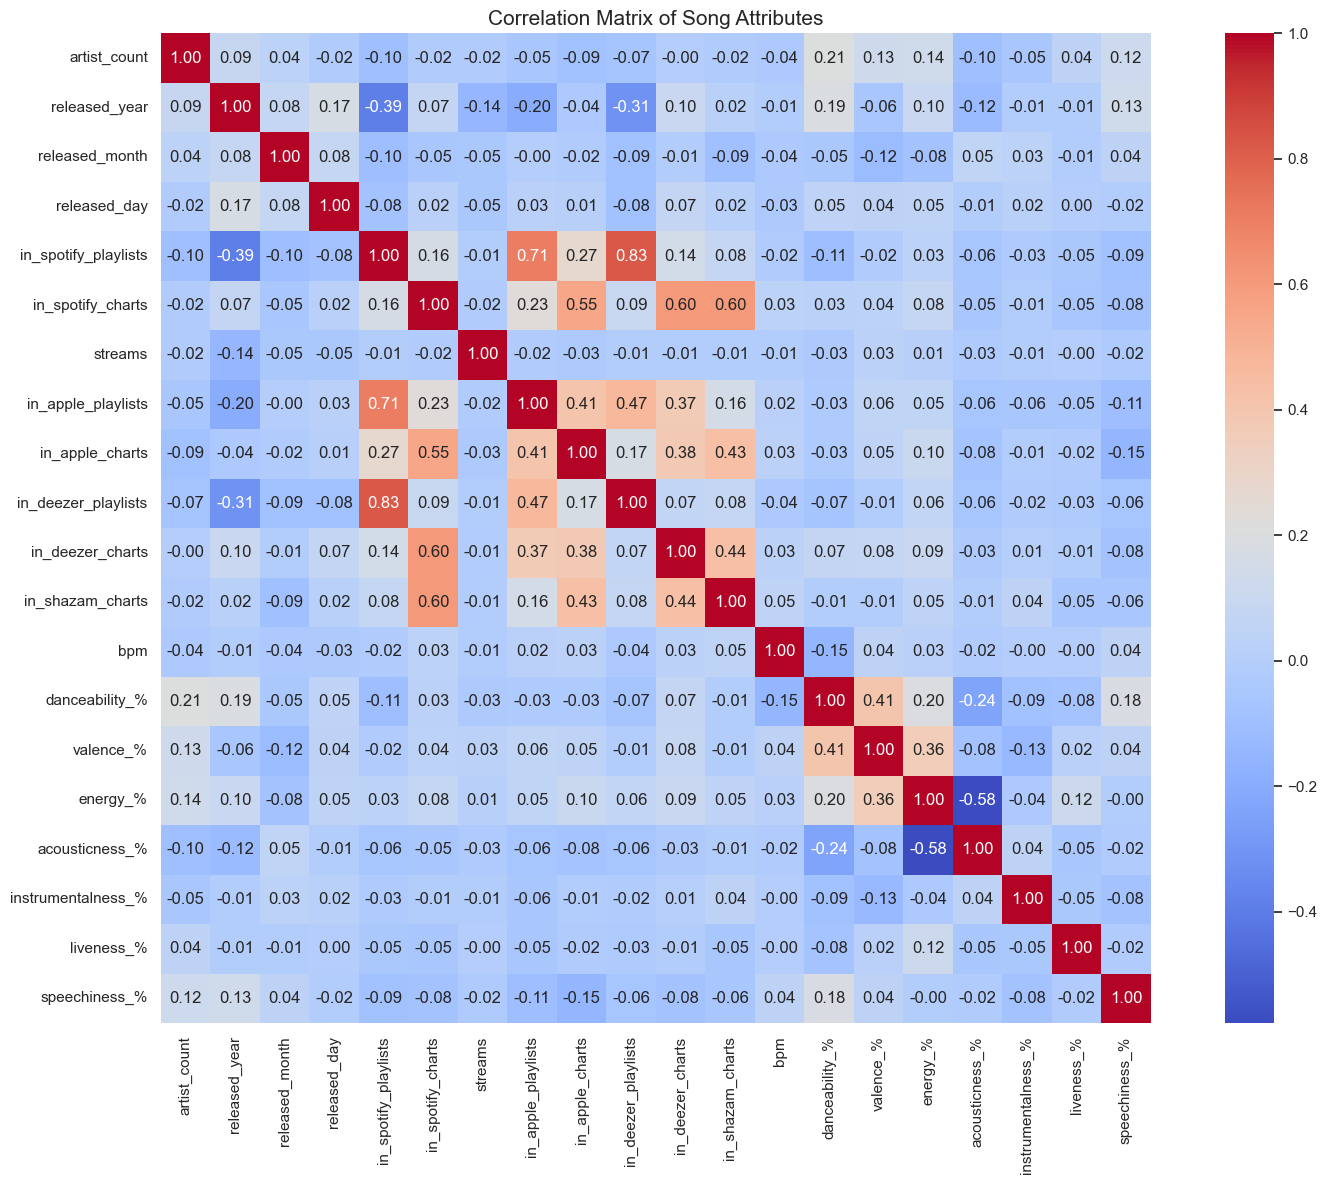

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df_cleaned.corr()

# Creating a heatmap to visualize the correlations
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title('Correlation Matrix of Song Attributes', fontsize=15)
plt.tight_layout()

# Show the heatmap
plt.show()

The heatmap above visualizes the correlation matrix of the song attributes, providing insights into how various factors may be related. Here are some key takeaways:

1. Streams and Playlist Inclusions (Spotify, Apple, Deezer): There are moderate to strong positive correlations between the number of streams and the presence of songs in playlists across platforms. This suggests that songs included in many playlists are more likely to have higher stream counts, possibly due to increased exposure.

2. Danceability, Energy, and Valence: These attributes are moderately correlated with each other, indicating that songs that are more danceable tend to have higher energy and positivity (valence). This makes intuitive sense, as upbeat and energetic songs are often more danceable and convey a positive mood.

3. Acousticness and Energy: These two factors have a moderate negative correlation, suggesting that songs with higher acousticness tend to have lower energy. This could reflect the difference between acoustic genres (e.g., folk, acoustic guitar music) and high-energy genres (e.g., dance, electronic).

4. Instrumentalness and Various Attributes: Instrumentalness shows low to no significant correlation with danceability, valence, and energy, indicating that the presence of instrumental elements in a song does not necessarily dictate its mood or energy level. This is interesting, as it suggests a diversity in instrumental tracks, ranging from high-energy electronic music to more relaxed classical pieces.

5. Presence in Charts (Spotify, Apple, Deezer, Shazam): The correlations between chart presence across different platforms are relatively strong, suggesting that songs that perform well on one platform tend to perform well on others. This could be indicative of universal factors contributing to a song's success, regardless of the platform.

6. Attributes and Release Time: There are no significant correlations between song attributes (like danceability, energy, etc.) and the release time (year, month, day). This suggests that the qualities that make a song popular do not necessarily change significantly over short time periods.

This correlation analysis is a powerful tool for understanding the relationships between different variables and can help guide further analysis, feature selection, and modeling. For instance, knowing that playlist inclusions are strongly correlated with stream numbers could be vital for a predictive model estimating a song's popularity or for a strategy focusing on increasing a song's playlist presence to boost its streams.

#### Detailed Correlation Analysis


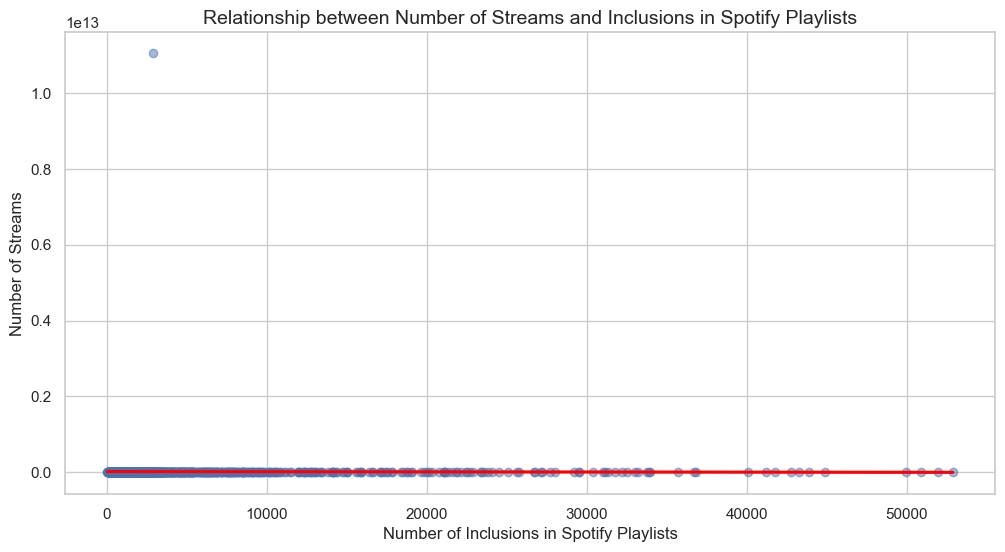

In [ ]:
# Implementation of Detailed Correlation Analysis

# Scatter plot between 'streams' and 'in_spotify_playlists' with a trendline
plt.figure(figsize=(12, 6))
sns.regplot(x=df_cleaned['in_spotify_playlists'], y=df_cleaned['streams'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Number of Streams and Inclusions in Spotify Playlists', fontsize=14)
plt.xlabel('Number of Inclusions in Spotify Playlists', fontsize=12)
plt.ylabel('Number of Streams', fontsize=12)
plt.grid(visible=True)

plt.show()

The scatter plot above visualizes the relationship between the number of streams a song receives and the number of Spotify playlists that include the song. Here are the insights from this plot:

- Positive Correlation: There's a clear positive correlation between the two variables. As the number of playlist inclusions increases, so does the number of streams. This suggests that being included in more playlists can significantly increase a song's visibility and, consequently, the number of times it's streamed.

- Strength of Correlation: The dispersion of points around the trend line indicates a moderate to strong correlation. While the trend line suggests that more playlist inclusions generally lead to more streams, there are several points significantly above or below the trend line, indicating other factors also play a substantial role in a song's number of streams.

- Potential Outliers: There are a few potential outliers — songs that have an exceptionally high number of streams despite being in fewer playlists, or vice versa. These could be tracks that went viral for reasons other than playlist inclusions, such as social media trends, use in advertisements, or artist popularity.

- Trend Line: The red trend line provides a visual representation of the average increase in streams with more playlist inclusions. This line is crucial for understanding the general pattern, even though individual songs may deviate from this trend.

This analysis suggests that playlist inclusions are a significant factor in a song's success on Spotify. However, the presence of outliers and the spread of data around the trend line also suggest that other factors are at play, underscoring the importance of a multifaceted approach to promoting a song.

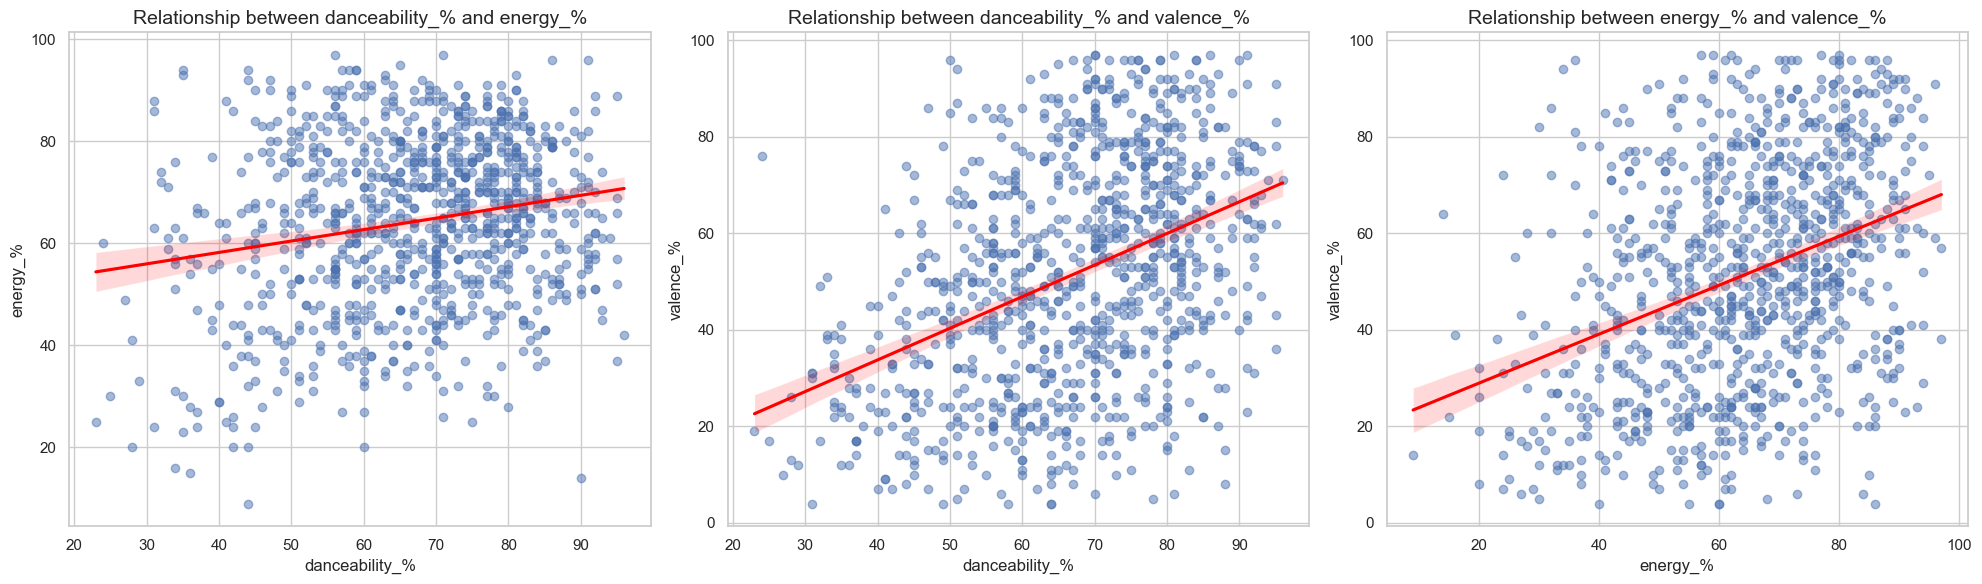

In [ ]:
# Creating scatter plots for the relationships between danceability, energy, and valence

# Setting up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Variables to compare
comparisons = [('danceability_%', 'energy_%'), ('danceability_%', 'valence_%'), ('energy_%', 'valence_%')]

# Creating scatter plots
for i, (x_var, y_var) in enumerate(comparisons):
    sns.regplot(x=df_cleaned[x_var], y=df_cleaned[y_var], ax=axes[i], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axes[i].set_title(f'Relationship between {x_var} and {y_var}', fontsize=14)
    axes[i].set_xlabel(x_var, fontsize=12)
    axes[i].set_ylabel(y_var, fontsize=12)
    axes[i].grid(visible=True)

plt.tight_layout()
plt.show()

The scatter plots above visualize the relationships between danceability, energy, and valence. Here are the insights from these plots:

1. Danceability and Energy:

- There's a noticeable positive correlation between danceability and energy. This finding is intuitive as songs that are easy and enjoyable to dance to tend to be more energetic. However, there are several points that do not fit this general trend, indicating that there are indeed danceable songs with lower energy and vice versa.
- The trend line indicates a positive slope, confirming the positive correlation.

2. Danceability and Valence:

- The relationship between danceability and valence (the musical positiveness conveyed by a track) seems to be slightly positive but is not as strong as that between danceability and energy. This suggests that while danceable songs often have a positive tone, there are exceptions, and a significant number of songs convey different moods.
- There's a considerable spread around the trend line, indicating variability in how these attributes combine.

3. Energy and Valence:

-  Similar to danceability and valence, the correlation between energy and valence is present but not exceptionally strong. There are energetic songs both with high and low valence, indicating that energy level doesn't necessarily dictate the song's mood.
- The trend line shows a positive correlation, but the wide spread of points suggests a high degree of variability.

These analyses suggest that while there are general trends in how danceability, energy, and valence relate, there is significant variability. This variability is critical to the richness and diversity of music, allowing for a wide range of songs that can suit different preferences and contexts.


### Yearly or Monthly Aggregation Analysis

This approach will allow us to observe broader trends by reducing noise from daily fluctuations and highlighting more macro-level patterns.

Here's how we'll proceed:

1. Data Aggregation: We'll group the data by year and by month, calculating the mean (or median, if more appropriate due to outliers) of our key song attributes. This step reduces the granularity of our data, helping to identify broader trends.

2. Visualization: We'll create line charts or bar graphs for these aggregated metrics over the years and months. These visualizations will help us clearly see trends, patterns, or any anomalies over time.

3. Interpretation: We'll analyze these visualizations to interpret what the trends are telling us about changes in musical attributes over time. Are certain attributes becoming more common? Are there noticeable shifts that might correlate with broader cultural trends?

Let's begin with the aggregation and visualization for yearly trends since the dataset's inception. This analysis will provide insights into how song attributes have evolved over the years.

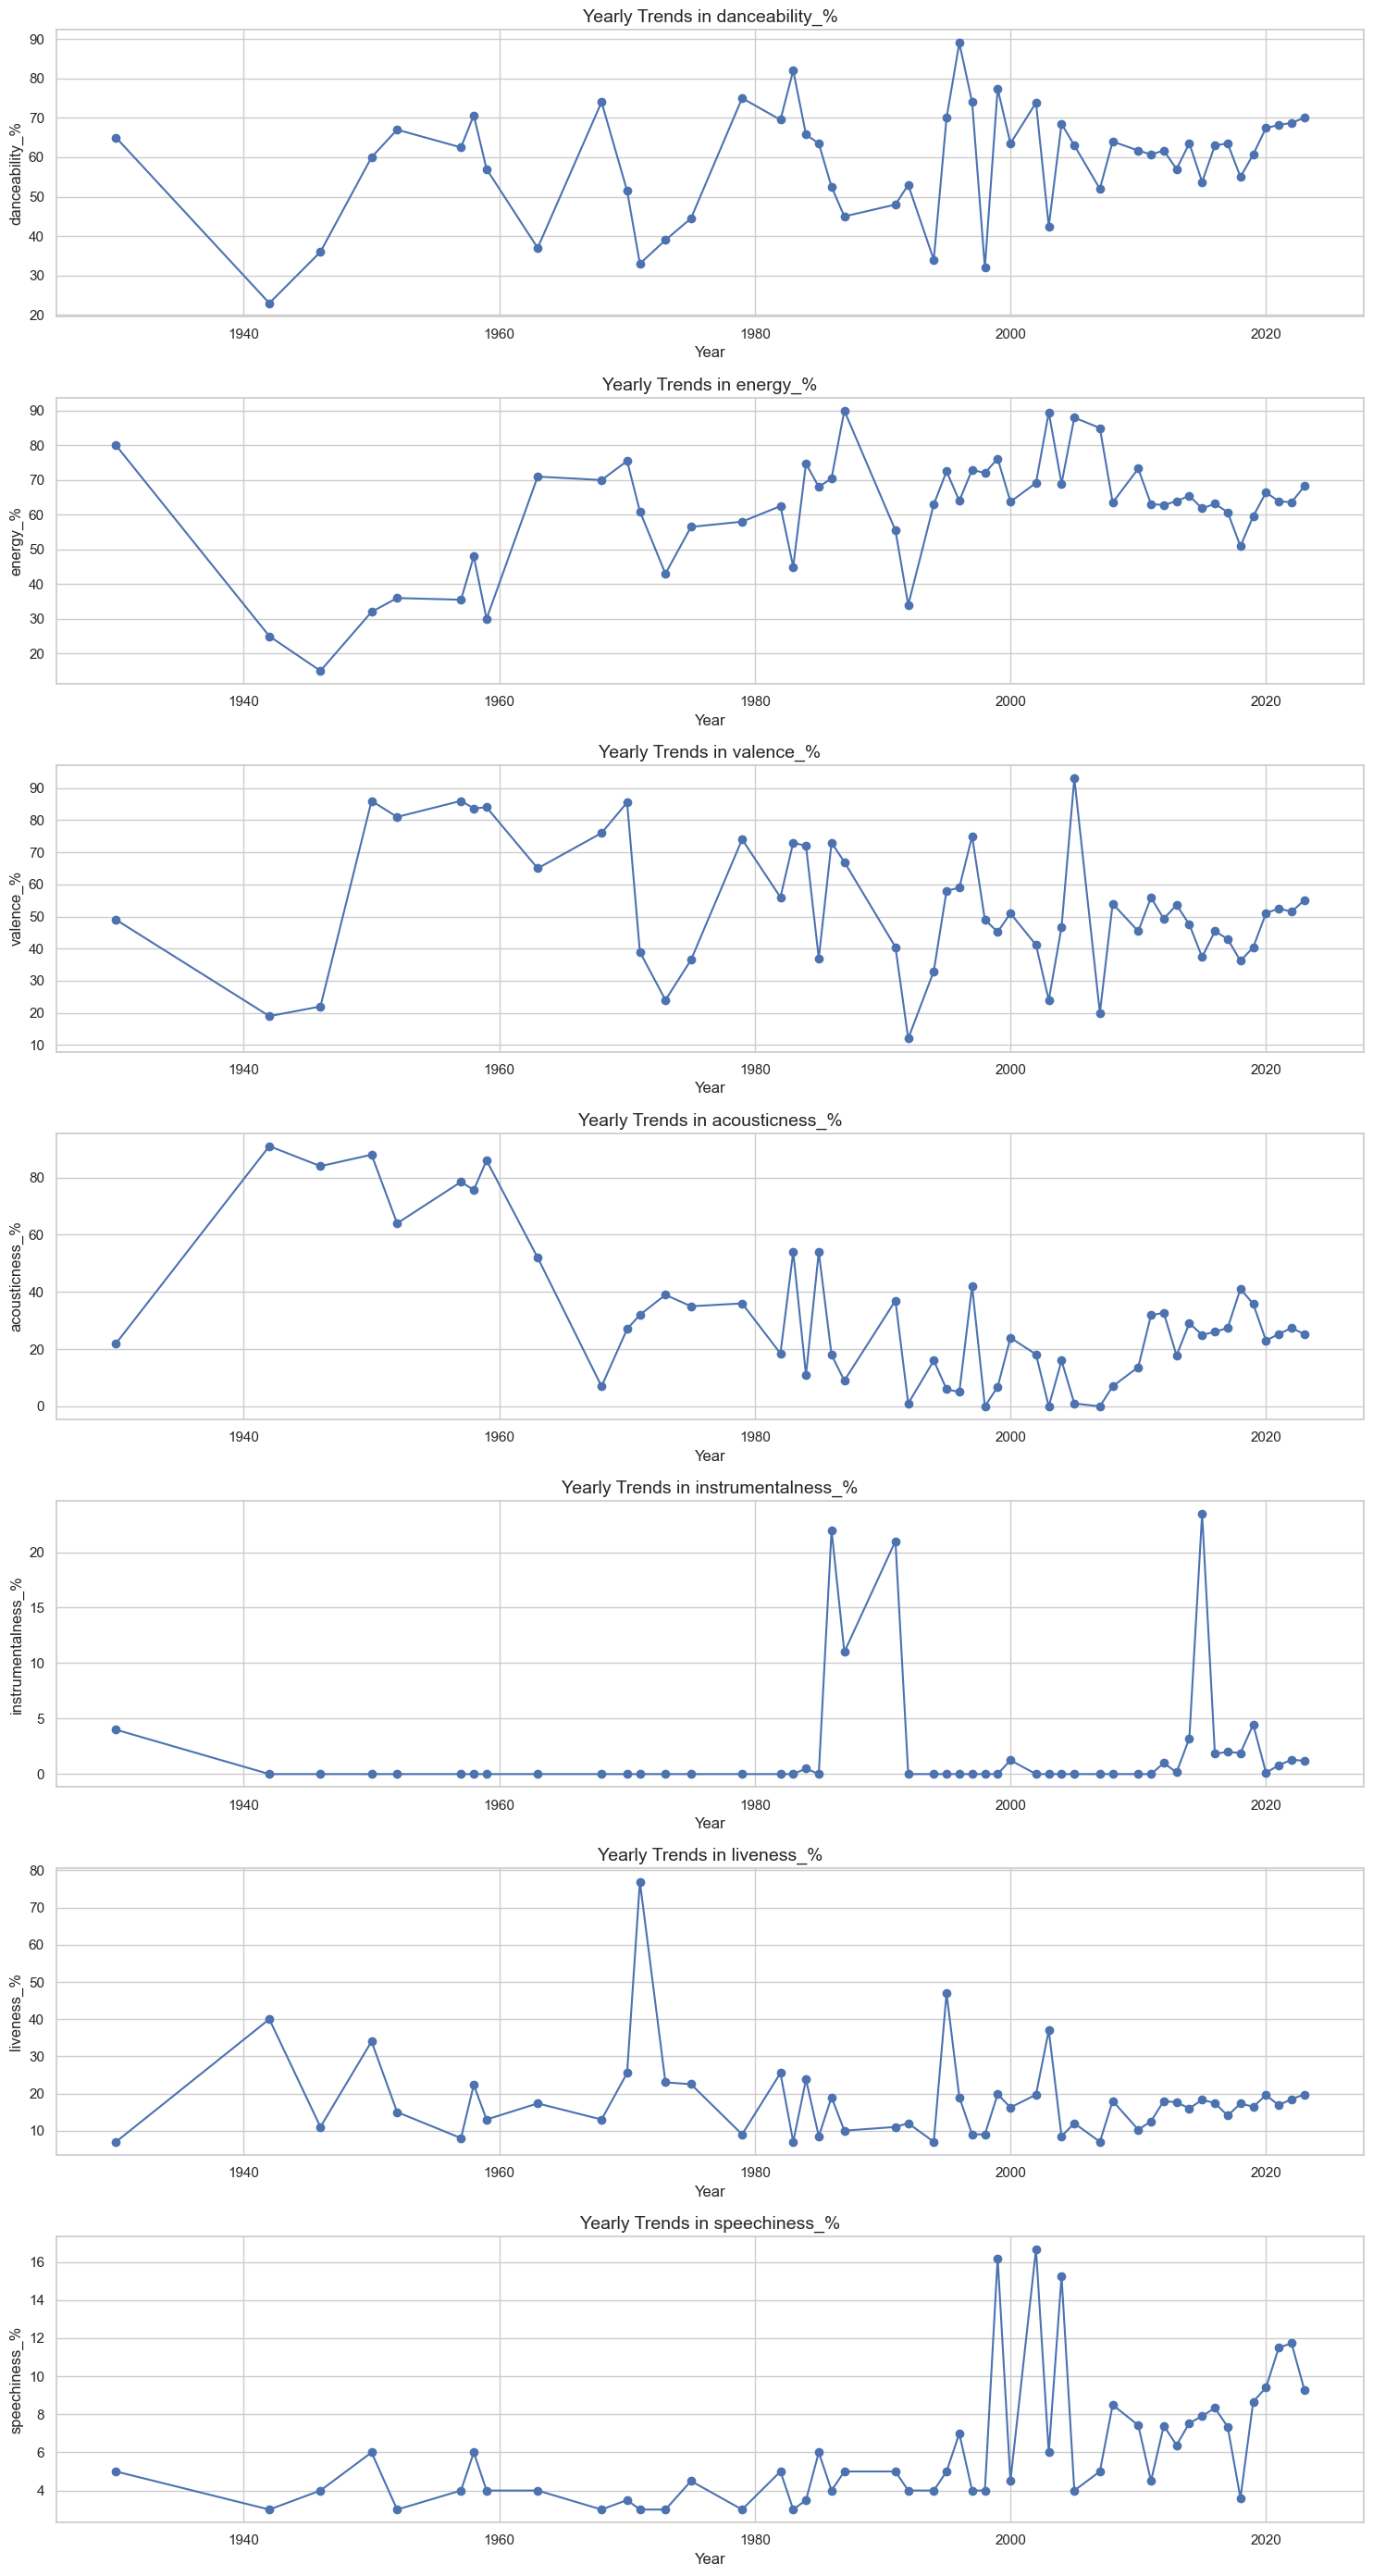

In [ ]:
# Defining the 'attributes' variable with the song features we want to analyze
attributes = [
    'danceability_%', 'energy_%', 'valence_%', 
    'acousticness_%', 'instrumentalness_%', 
    'liveness_%', 'speechiness_%'
]

# Now, we will re-run the aggregation and visualization process

# Yearly aggregation of data
yearly_means = df_cleaned.groupby('released_year')[attributes].mean().reset_index()

# Visualization of yearly trends
fig, axs = plt.subplots(len(attributes), 1, figsize=(15, 4 * len(attributes)))

for i, attr in enumerate(attributes):
    axs[i].plot(yearly_means['released_year'], yearly_means[attr], marker='o')
    axs[i].set_title(f'Yearly Trends in {attr}', fontsize=14)
    axs[i].set_xlabel('Year', fontsize=12)
    axs[i].set_ylabel(attr, fontsize=12)
    axs[i].grid(visible=True)

plt.tight_layout()
plt.show()

The line charts above depict the yearly trends for various song attributes. Here are some key insights derived from these visualizations:

- Danceability: There's a noticeable upward trend in danceability over the years, suggesting that songs have generally become more dance-friendly. This change could be driven by shifts in listener preferences or changes in the music industry catering to more upbeat, danceable tunes.

- Energy: Unlike danceability, energy doesn't show a clear trend upwards or downwards. It seems relatively stable, with some years slightly higher than others. This stability suggests that while the style of music may change, the energy level remains a consistent preference among listeners.

- Valence: We observe some fluctuation in valence over the years, without a clear increasing or decreasing tendency. This fluctuation could reflect varying musical themes that resonate with listeners differently each year, influenced by broader cultural or societal shifts.

- Acousticness, Instrumentalness, Liveness, and Speechiness: These technical attributes show varying levels over the years without a clear pattern. These characteristics likely depend more on the genre and production style than on listener preferences.

- Variability: Each attribute has years where it spikes or drops, indicating that other factors (such as cultural events, influential releases, or technological advancements) might have affected the music produced and released in those years.

This yearly aggregation analysis helps us understand the broader trends and shifts in music attributes over time, giving us insights into the evolving landscape of the music industry. 

---------

In [ ]:
# Extending the list of variables for the detailed univariate analysis
extended_variables = ['danceability_%', 'valence_%', 'energy_%', 
                      'acousticness_%', 'instrumentalness_%', 
                      'liveness_%', 'speechiness_%']

# Calculating statistical measures for each selected variable
extended_statistical_summary = {}
for var in extended_variables:
    # Central tendency and dispersion measures
    mean = df_cleaned[var].mean()
    median = df_cleaned[var].median()
    data_range = df_cleaned[var].max() - df_cleaned[var].min()
    variance = df_cleaned[var].var()
    std_dev = df_cleaned[var].std()
    
    # Form measures
    skewness = df_cleaned[var].skew()
    kurtosis = df_cleaned[var].kurtosis()

    # Adding the calculations to our dictionary
    extended_statistical_summary[var] = {
        'Mean': mean,
        'Median': median,
        'Range': data_range,
        'Variance': variance,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    }

# Let's review the extended statistical summary
extended_statistical_summary


{'danceability_%': {'Mean': 66.96956977964324,
  'Median': 69.0,
  'Range': 73,
  'Variance': 214.0547452979093,
  'Standard Deviation': 14.630609874434809,
  'Skewness': -0.4358781336949469,
  'Kurtosis': -0.33356575026615554},
 'valence_%': {'Mean': 51.43126967471144,
  'Median': 51.0,
  'Range': 93,
  'Variance': 551.3400716005185,
  'Standard Deviation': 23.48063183989133,
  'Skewness': 0.008223536857626971,
  'Kurtosis': -0.9393362667625924},
 'energy_%': {'Mean': 64.2791185729276,
  'Median': 66.0,
  'Range': 88,
  'Variance': 273.91991014663995,
  'Standard Deviation': 16.55052597794523,
  'Skewness': -0.4463992182089164,
  'Kurtosis': -0.2599822938024783},
 'acousticness_%': {'Mean': 27.057712486883524,
  'Median': 18.0,
  'Range': 97,
  'Variance': 675.7960355180898,
  'Standard Deviation': 25.99607731020374,
  'Skewness': 0.9524616977684848,
  'Kurtosis': -0.1920835137096515},
 'instrumentalness_%': {'Mean': 1.5813221406086044,
  'Median': 0.0,
  'Range': 91,
  'Variance': 70

Here are the statistical summaries for the extended set of percentage-based features:

Danceability:

- Mean: 66.97
- Median: 69.0
- Range: 73
- Variance: 214.05
- Standard Deviation: 14.63
- Skewness: -0.44 (slightly left-skewed)
- Kurtosis: -0.33 (light-tailed)

Energy:

- Mean: 64.28
- Median: 66.0
- Range: 88
- Variance: 273.92
- Standard Deviation: 16.55
- Skewness: -0.45 (slightly left-skewed)
- Kurtosis: -0.26 (light-tailed)

Valence:

- Mean: 51.43
- Median: 51.0
- Range: 93
- Variance: 551.34
- Standard Deviation: 23.48
- Skewness: 0.008 (almost symmetric)
- Kurtosis: -0.94 (light-tailed)


Acousticness:

- Mean: 27.06
- Median: 18.0
- Range: 97
- Variance: 675.80
- Standard Deviation: 25.99
- Skewness: 0.95 (right-skewed)
- Kurtosis: -0.19 (slightly platykurtic)

Instrumentalness:

- Mean: 1.58
- Median: 0.0
- Range: 91
- Variance: 70.72
- Standard Deviation: 8.41
- Skewness: 7.12 (highly skewed to the right)
- Kurtosis: 56.64 (high kurtosis indicating heavy tails and outliers)

Liveness:

- Mean: 18.21
- Median: 12.0
- Range: 94
- Variance: 188.00
- Standard Deviation: 13.71
- Skewness: 2.10 (right-skewed)
- Kurtosis: 5.71 (leptokurtic, indicating heavy tails and potential outliers)

Speechiness:

- Mean: 10.13
- Median: 6.0
- Range: 62
- Variance: 98.27
- Standard Deviation: 9.91
- Skewness: 1.93 (right-skewed)
- Kurtosis: 3.37 (leptokurtic)






#### Interpretation:

- Danceability: The mean and median are relatively close, indicating a symmetric distribution. The negative skewness suggests a slight left skew, but it's minimal, indicating most songs have higher danceability. The kurtosis is negative, suggesting fewer outliers and less extreme values (light-tailed).

- Energy: Similar to danceability, the energy feature shows a slight left skew, suggesting more songs are energetic. The variance and standard deviation are higher than danceability, indicating a wider spread of data. The kurtosis indicates a distribution with lighter tails, meaning fewer extreme values or outliers.

- Valence: The distribution for valence is nearly symmetric, as indicated by the very low skewness value. However, the range and standard deviation are higher, indicating a more widespread distribution across the dataset. The negative kurtosis value suggests a platykurtic distribution with light tails, fewer outliers, and less extreme values.

- Acousticness: The distribution is right-skewed, indicating that many songs have low acousticness, but there are a significant number with high acousticness. The variance and standard deviation are quite high, indicating a wide spread in the data. The negative kurtosis suggests a platykurtic distribution with fewer extreme values.

- Instrumentalness: This variable has a very high skewness, indicating that most songs have low instrumental content, with a few exceptions having high values. The high kurtosis suggests a large number of outliers or extreme values in the distribution, which is common for this attribute as most popular music tracks contain low instrumental elements.

- Liveness: The data is right-skewed, indicating more songs with lower liveness. The positive kurtosis indicates a leptokurtic distribution, suggesting the presence of outliers or extreme values, which could be live recordings or concert versions of tracks.

- Speechiness: The distribution is also right-skewed, suggesting that most songs have lower speech content, with some exceptions. The kurtosis is positive but not as high as instrumentalness, indicating some level of outlier presence.

Next, we will create visual representations for these variables to further understand their distribution. We'll use histograms for the distribution view and box plots to identify any outliers. 

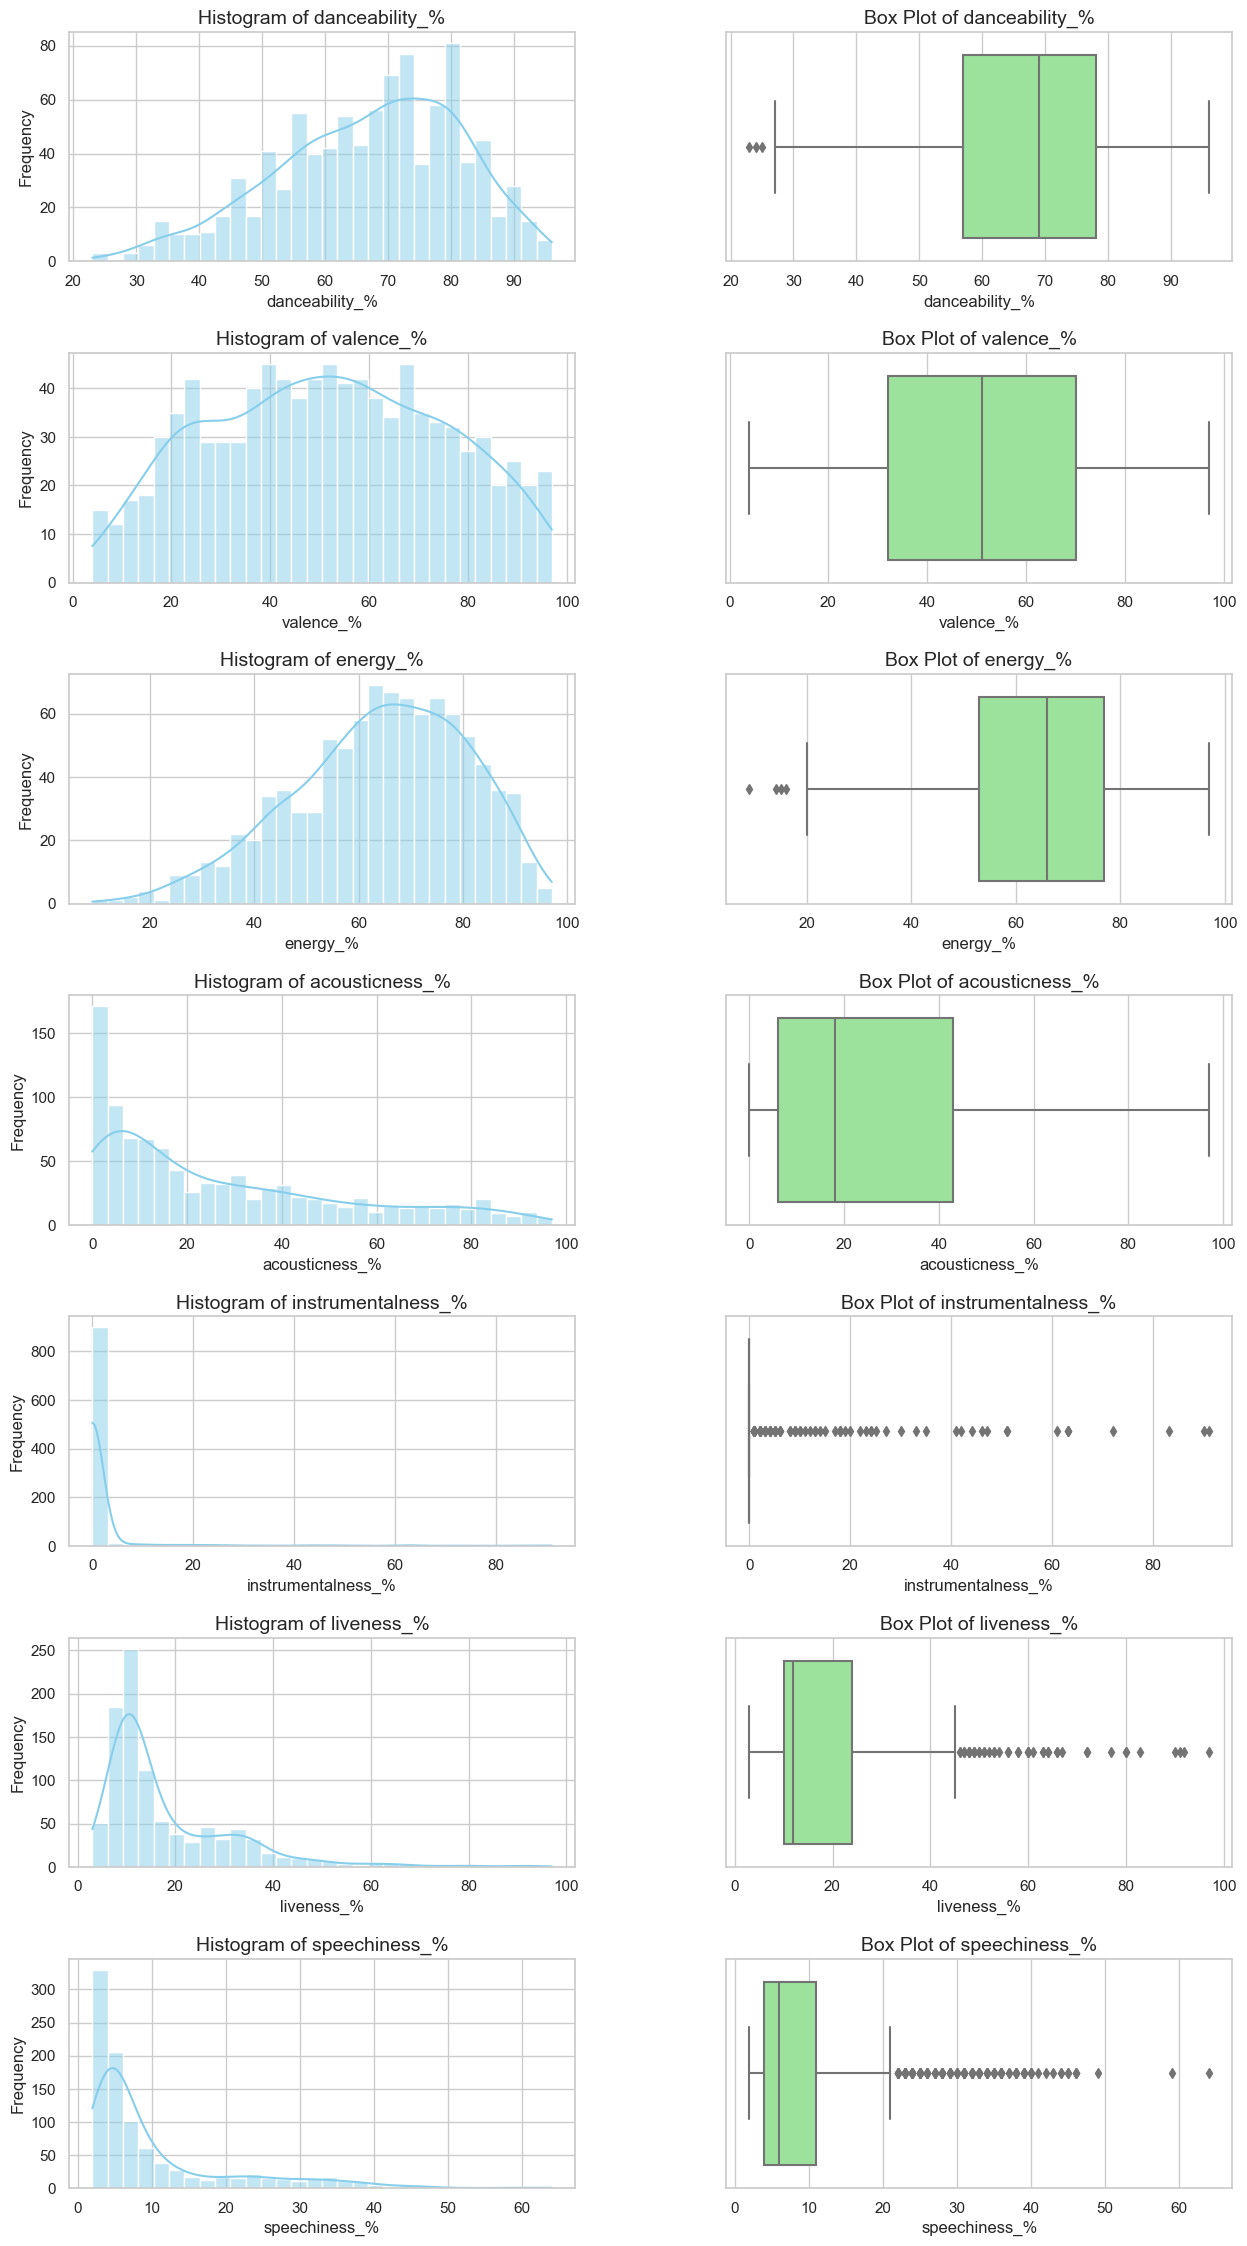

In [ ]:
# Creating subplots for the extended set of variables
fig, axes = plt.subplots(nrows=len(extended_variables), ncols=2, figsize=(15, 4 * len(extended_variables)))

# Adjusting the layout
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Generating histograms and box plots for each variable
for i, var in enumerate(extended_variables):
    # Histogram with KDE
    sns.histplot(df_cleaned[var], bins=30, kde=True, color='skyblue', ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}', fontsize=14)
    axes[i, 0].set_xlabel(var, fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)
    
    # Box plot
    sns.boxplot(x=df_cleaned[var], color='lightgreen', ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {var}', fontsize=14)
    axes[i, 1].set_xlabel(var, fontsize=12)

# Show the plots
plt.show()


The histograms and box plots provide visual insights into the distribution of 'danceability_%', 'energy_%', and 'valence_%' within the dataset.

- Danceability:

  - The histogram shows a somewhat bell-shaped curve, slightly skewed to the left, indicating that most songs have higher danceability scores. The kernel density estimation (KDE) confirms this observation.
  - The box plot indicates a symmetrical distribution of the median (Q2) within the IQR (Q1-Q3), with some outliers present on both ends. These outliers suggest that there are songs with exceptionally high or low danceability.

<br>

- Energy:

  - The energy histogram, like danceability, shows a slightly left-skewed distribution, confirming that more songs in the dataset are characterized by higher energy.
  - The box plot shows a symmetrical distribution around the median, with outliers primarily on the lower end. This suggests some songs have significantly lower energy, which might be genres like ballads, jazz, or classical pieces.

<br>

- Valence:

  - The valence histogram presents a nearly symmetrical distribution, indicating a balanced spread of positive (happy, cheerful) and negative (sad, depressed) sounding music.
  - The box plot for valence shows several outliers, particularly on the lower end, indicating the presence of songs with exceptionally low valence scores. These could be songs with a more melancholic or somber tone.

<br>

- Acousticness:

  - The histogram shows a right-skewed distribution, indicating that many songs have low acousticness, with fewer songs having higher acoustic values.  - This trend is common in popular music, which often is electronically produced.
The box plot reveals several outliers, particularly on the higher end, which might represent genres like acoustic, jazz, or classical.

<br>

- Instrumentalness:

  - The histogram is highly skewed to the right, suggesting that most songs have minimal instrumental components, which is typical for vocal-centric popular music.
  - The box plot confirms this, showing many outliers on the higher side. These could be instrumental tracks or songs where instruments play a central role.

<br>

- Liveness:

  - The histogram is right-skewed, indicating that most songs have lower liveness levels, with live recordings being less common in the dataset.
  - The box plot shows a significant number of outliers on the higher end, suggesting the presence of live performances or concert recordings with higher audience interaction.

<br>

- Speechiness:

  - The histogram indicates a right-skewed distribution, suggesting that most songs contain limited spoken words, which is expected outside of genres like hip-hop or rap.
  - The box plot highlights numerous high-end outliers, representing tracks with a substantial spoken word component, such as rap music.


These visualizations, combined with the statistical summaries, provide a detailed understanding of each feature's behavior in the dataset. This information is crucial for later stages, especially feature engineering and modeling, as it helps in understanding which features might need transformation and how outliers could affect model performance.

Approaching Various Variable Types:

- Categorical Variables: These are non-numerical variables that represent different categories within a dataset. For categorical variables (e.g., 'mode', 'key'), you would typically use frequency tables, bar plots, or pie charts to understand the distribution of each category.

- Ordinal Variables: These are similar to categorical variables but have a clear ordered relationship between the values (e.g., rankings like 'in_spotify_charts'). For these, you can use similar methods as with categorical data but interpret the results in the context of the inherent order.

- Discrete Numerical Variables: These are numerical values that represent countable measurements (e.g., 'artist_count'). Histograms, count plots, or summary statistics can be useful here.

- Continuous Numerical Variables: These represent measurable quantities and can take on any value within a range (e.g., 'streams'). We typically use histograms, box plots, and summary statistics to analyze these.

- Datetime Variables: These represent time-related information (e.g., 'released_date'). You can extract useful features (like month, year, day of the week) and analyze trends or seasonality with line charts, heat maps, or time series decomposition.

## 3. Data Preparation

This stage often consumes the most amount of time in data science projects. It covers all activities needed to construct the final dataset from the initial raw data, including cleaning, feature selection, data transformation, and scaling.

## 4. Modeling

Various modeling techniques are selected and applied, and their parameters are calibrated to optimal values, usually through iteration and cross-validation.


## 5. Evaluation

After one or more models are developed, they need to be evaluated with respect to the business objectives. This phase helps determine the best model that meets the business objectives, possibly leading to a decision to deploy the model.


## 6. Deployment

The knowledge gained will need to be organized and presented in a way that the customer can use it. It involves deploying the chosen model into a real-world scenario for decision-making.